<a href="https://colab.research.google.com/github/nimnathw/mathematics-for-machine-learning/blob/main/linear_algebra_for_ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra for Machine Learning

### Linear Algebra I
**Week 1: Vectors and Operations**
- Introduction to vectors: magnitude, direction, interpretation
- Addition of two vectors as linear combinations

**Week 2: Dot and Cross Products**
- Geometric interpretation of dot product
- Geometric interpretation of cross product
- Calculating area of triangles, parallelograms, and parallelepipeds

**Week 3: Vector Decomposition and Planes**
- Vector decomposition with respect to another vector
- Formula for decomposition with respect to another vector
- Equation of a plane with two given vectors

**Week 4: Distance Calculation**
- Equation of a line
- Equation of a plane
- Calculating distance between a point and a line
- Calculating distance between a point and a plane

**Week 5: Linear Independence and Span**
- Understanding linear independence and span
- Gaussian elimination and Gauss-Jordan elimination

**Week 6: Matrix Interpretation**
- Interpreting matrices as linear transformations

**Week 7: Subspaces**
- Rank of a Matrix
- Subspaces, column space, row space, and null space of matrices

**Week 8: Fundamental Theorem of Linear Algebra**
- Orthonormal vectors
- Rank-Nullity Theorem
- Fundamental Theorem of Linear Algebra

**Week 9: Types of Matrices**
- Identity Matrix
- Rotation Matrix
- Dilation Matrix
- Shear Matrix

**Week 10: Determinants and Invertibility**
- Interpreting determinants
- Understanding the invertibility of matrices
- Rank and non-singular matrices

**Week 11: Matrix Composition**
- Interpreting matrix matrix multiplicaion
- Elementary Row Matrices
- Properties of Matrix Multiplication
- Orthogonal Matrices

**Week 12: Matrix Decompositions**
- LU decomposition

**Week 13: QR decomposition**

**Week 14: Eigen decomposition**

**Week 15: Symmetric Matrices and Positive Definite Matrices**
- Covariance Matrices
- Gradient Vectors and Hessian Matrices
- Critical Point Analysis

**Week 16: Singular Value Decomposition (SVD)**
- Interpratation of SVD as a change of basis

**Week 17: Principal Component Analysis (PCA)**
- PCA with Eigen Decomposition
- PCA with SVD

----

### Linear Algebra II

**Week 1: Solve Linear Regression**
- QR decomposition for direct estimation of Linear Regression models

**Week 2: Gradient Descent Algorithm**
- Jacaboian, Gradient, Hessian Matrices
- Modular Approach to Machine Learning
- Gradient Descent Algorithm
- Regularization

**Week 3: Neural Networks**
- Back-propogation Algorithm in Neural Networks

**Week 4: Complex Vectors and Complex Matrices**
- Hermitian Matrices

**Week 5: Solve Differential Equations**

**Week 6: Graph Theory and Network Ananlysis**

**Week 7: Decision Trees**

**Week 8: Numerical Linear Algebra**



# Linear Regression

1. **Objective Function:**
   - In linear regression, the goal is to minimize the sum of squared errors between the actual target variable $y$ and the predicted values from the linear model $X \beta$.
   - This can be expressed as the optimization problem $$\min ||y - X \beta||^2$$.

2. **Expressing in Matrix Form:**
   - The squared error function can be expanded and expressed in matrix form as $\min ||y - X \beta||^2 = \min ||y - X \beta||^2 = \min (y - X \beta)^T (y - X \beta)$.
   - $ (y - X\beta)^T (y - X\beta) $ expands to $ y^T y - 2 \beta^T X^T y + \beta^T X^T X \beta $.


3. **Deriving the Normal Equation:**
   - To minimize the objective function, we take the derivative with respect to $\beta$ and set it to zero, yielding
   $$- 2* X^T y +2 *X^TX \beta = 0$$.
   $$=> \beta = (X^TX)^{-1} X^T y$$

4. **QR Decomposition:**
   - QR decomposition decomposes the feature matrix $X$ into an orthogonal matrix $Q$ and an upper triangular matrix $R$. This yields the equation $X = QR$.

5. **Transforming the Equation:**

  - Substitute the QR decomposition of $X$ into the equation:

   $$\beta = (X^TX)^{-1}X^Ty$$

  - Since $X = QR$, the equation becomes:

   $$\beta = (R^TQ^TQR)^{-1}R^TQ^Ty$$

  - Given that $Q$ is orthogonal, $Q^TQ$ is the identity matrix, so we get:

   $$\beta = (R^TR)^{-1}R^TQ^Ty$$

   $$\beta = R^{-1}(R^T)^{-1}R^TQ^Ty$$

   - Due to the properties of inverse matrices, $(R^T)^{-1}R^T$ equals the identity matrix, simplifying the equation to $$\beta = R^{-1}Q^T y$$.

6. **Parameter Interpretation:**
   - The resulting parameter vector $\beta$ represents the coefficients of the features in the linear regression model.
   - Each element in $\beta$ corresponds to the impact of the respective feature on the target variable, providing insights into the relationship between the features and the target variable.

In [ ]:
import numpy as np

np.random.seed(0)

# Simulating data for 100 patients
num_patients = 100

# Creating synthetic data for features and target variable
molecular_weight = np.random.uniform(100, 500, num_patients)
solubility = np.random.uniform(0.1, 0.9, num_patients)
clinical_data = np.random.randint(1, 4, num_patients)  # 1, 2, 3 representing different clinical trial phases
patient_age = np.random.randint(18, 80, num_patients)
bioactivity = 0.5 * molecular_weight + 0.8 * solubility + 0.1 * clinical_data + np.random.normal(0, 10, num_patients)

# Creating the 2D array
data = np.column_stack((molecular_weight, solubility, clinical_data, patient_age, bioactivity))

# Column names for the features
column_names = ['Intercept', 'Molecular Weight', 'Solubility', 'Clinical Data', 'Patient Age']

# Printing the array
#print(data)


# Extracting features and the target variable
X = data[:, :-1]  # Features
y = data[:, -1]  # Target variable

# Adding an intercept term by appending a column of ones to the feature matrix
intercept = np.ones((X.shape[0], 1))
X_with_intercept = np.hstack((intercept, X))

# Performing QR decomposition
Q, R = np.linalg.qr(X_with_intercept)

# Solving for the parameter (b values) vector using the formula: b = (Q^T * y) / R
b = np.linalg.inv(R).dot(Q.T).dot(y)

# Printing the parameter vector
print("Parameter vector (b values):")
print(b)

# Printing the column names and corresponding beta values
print("Corresponding Beta Values:")
for i in range(len(column_names)):
    print(f"{column_names[i]}: {b[i]}")



Parameter vector (b values):
[ 0.86496178  0.50559983  0.12998637 -0.66860361 -0.0271114 ]
Corresponding Beta Values:
Intercept: 0.8649617793285911
Molecular Weight: 0.5055998300627698
Solubility: 0.1299863667640042
Clinical Data: -0.6686036060237033
Patient Age: -0.027111399567728012


# Jacobian, Gradient and Hessian Matrices in Multivariate Calculus


- Multivariate calculus extends the principles of calculus to functions of multiple variables.
- The Jacobian and Hessian matrices are essential tools in multivariate calculus, particularly in optimization, where they help analyze local behavior.

**1.1 Jacobian Matrix**
- The Jacobian matrix represents the derivative of a vector-valued function.
- Let $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$ be a **vector-valued** function.
- The Jacobian matrix $J_f$ has dimensions $m \times n$ and is defined as:
 $$J_f = \begin{bmatrix}
  \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n}\\
  \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} & \cdots & \frac{\partial f_2}{\partial x_n}\\
  \vdots & \vdots & \ddots & \vdots\\
  \frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & \cdots & \frac{\partial f_m}{\partial x_n}\\
  \end{bmatrix}$$
- Each entry of the Jacobian represents the partial derivative of one component of $f$ with respect to one of the input variables.

**1.2 Gradient**

For a scalar-valued function, the matrix of first partial derivatives is simply a row vector or a column vector, depending on the convention used. If you have a scalar function $f: \mathbb{R}^n \rightarrow \mathbb{R}$, the matrix of first partial derivatives is usually represented as either a row vector or a column vector, depending on whether you want to treat it as a row or column.

Let's take a function $f(x_1, x_2, \ldots, x_n)$ with \(n\) variables. The matrix of first partial derivatives is given by:

$$
\nabla f = \left[\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n}\right]
$$

or

$$
\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}
$$
This matrix is also referred to as the gradient of the scalar function.


**1.3 Hessian Matrix**
- The Hessian matrix is used to analyze the second-order behavior of a scalar-valued function.
- Let $f: \mathbb{R}^n \rightarrow \mathbb{R}$ be a **scalar-valued** function.
- The Hessian matrix $\mathcal{H}_f$ has dimensions $n \times n$ and is defined as:
$$\mathcal{H}_f = \begin{bmatrix}
  \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n}\\
  \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n}\\
  \vdots & \vdots & \ddots & \vdots\\
  \frac{\partial^2 f}{\partial x_n \partial x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}\\
  \end{bmatrix}$$
- The diagonal entries represent second partial derivatives with respect to individual variables, while off-diagonal entries represent mixed partial derivatives.

**1.4 Significance of Jacobian and Hessian Matrices**
-     The Jacobian matrix and gradient play a vital role in optimization tasks, aiding in the determination of the direction and rate of the fastest increase of a scalar field.
- The Hessian matrix is instrumental in understanding the curvature of the function, enabling the identification of critical points, such as minima, maxima, and saddle points, within the scalar field.

**1.5 Examples**
Consider the function $$f: \mathbb{R}^2 \rightarrow \mathbb{R}^2$$ defined as:

$$f(x, y) = \begin{bmatrix}
    3x^2 + 2y \\
    x^3 - y^2
\end{bmatrix}$$

**1.5.1 Calculation of Jacobian Matrix (J_f):**

To find the Jacobian matrix, we need to compute the partial derivatives of each component of the vector function with respect to each input variable.

So, we have:

$$\frac{\partial f_1}{\partial x} = 6x, \quad \frac{\partial f_1}{\partial y} = 2$$
$$\frac{\partial f_2}{\partial x} = 3x^2, \quad \frac{\partial f_2}{\partial y} = -2y$$

Hence, the Jacobian matrix, $J_f$, is:

$$J_f = \begin{bmatrix}
    6x & 2 \\
    3x^2 & -2y
\end{bmatrix}$$

**1.5.2 Calculation of Gradient and Hessian Matrix ($\mathcal{H}_f$):**

Consider the following scalar function:
$$f(x, y) = x^2 + 3xy + 2y^2$$

**Calculation of Gradient:**

To find the gradient of the function $f(x, y) = x^2 + 3xy + 2y^2$, we compute the partial derivatives with respect to each input variable:

$$\nabla f = \begin{bmatrix}
    \frac{\partial f}{\partial x} \\
    \frac{\partial f}{\partial y}
\end{bmatrix}
= \begin{bmatrix}
    2x + 3y \\
    3x + 4y
\end{bmatrix}$$

**Calculation of Hessian Matrix:**

To find the Hessian matrix, we need to compute the second-order mixed partial derivatives of the function $f(x, y) = x^2 + 3xy + 2y^2$.

$$\frac{\partial^2 f}{\partial x^2} = 2, \quad \frac{\partial^2 f}{\partial y^2} = 4, \quad \frac{\partial^2 f}{\partial x \partial y} = 3, \quad
\frac{\partial^2 f}{\partial y \partial x} = 3$$

Hence, the Hessian matrix, \(H_f\), is:

$$H_f = \begin{bmatrix}
    2 & 3 \\
    3 & 4
\end{bmatrix}$$

In this example, the gradient represents the vector of first-order derivatives of the scalar function, while the Hessian matrix represents the matrix of second-order mixed partial derivatives, providing information about the curvature and behavior of the function at a particular point. These concepts are crucial in optimization, machine learning, and various fields of mathematics and science.

**Properties of Jacobian, Gradient and Hessian Matrices**

**Objective:** In this lecture, we will explore the properties of Jacobian and Hessian matrices, as well as their applications in various fields.

**1. Properties of Jacobian Matrix**
1. **Properties of linearity and the chain rule:** The Jacobian matrix, when applied to vector-valued functions, exhibits properties of linearity and obeys the chain rule. This property allows it to capture the local behavior of vector-valued functions, providing insights into how small changes in the input variables affect the outputs. In essence, linearity enables the Jacobian matrix to approximate a complex, nonlinear function around a specific point using a linear transformation. This approximation is crucial for understanding the behavior of functions in the vicinity of a given point.

2. **Analyzing the rate of change of vector-valued functions:** The Jacobian matrix serves as a fundamental tool for analyzing the rate of change of vector-valued functions. By capturing the derivatives of each component of the function with respect to each input variable, the Jacobian matrix offers valuable information about how small changes in the input variables impact the function's output. This understanding is vital in various mathematical fields, including physics, engineering, and economics, where the analysis of complex systems often relies on comprehending the rate of change of multiple variables simultaneously.

3. **Relation to the gradient and insights into directional derivatives:** The Jacobian matrix is directly related to the gradient of a scalar field. It provides insights into the directional derivative, helping to understand how a function changes in a particular direction. By using the components of the Jacobian matrix, it is possible to determine the direction of the fastest increase of the vector-valued function. This knowledge is crucial for studying the local behavior of vector fields, identifying critical points, and analyzing the behavior of functions in various real-world applications.


**2. Properties of Gradient**
- The gradient of a scalar field points in the direction of the steepest ascent. It is perpendicular to the level sets of the function, indicating the direction of the fastest increase of the scalar field. Furthermore, the gradient is zero at local minima and maxima.

**3. Properties of Hessian Matrix**
- The Hessian matrix is symmetric and real.
- It possesses properties of symmetry and definiteness, offering valuable information about the curvature of the scalar function. Moreover, the Hessian matrix is directly linked to the second-order Taylor expansion, aiding in the characterization of critical points and the identification of inflection points.

**Applications:**
- The Jacobian matrix finds extensive use in the study of transformations, differential equations, and optimization problems, especially in the realms of robotics, computer graphics, and physics.
- The Hessian matrix plays a vital role in optimization algorithms, image processing, and machine learning, contributing to the identification of convex and non-convex regions and assisting in the determination of convergence rates in iterative methods.
- In neural networks, they play a role in backpropagation and weight update rules.

In [ ]:
import sympy as sp

# Define the symbols
x, y = sp.symbols('x y')

# Define the vector-valued function f(x, y)
f1 = 3*x**2 + 2*y
f2 = x**3 - y**2
f = sp.Matrix([f1, f2])

# Calculate the Jacobian matrix J_f
J_f = f.jacobian([x, y])

# Print the Jacobian matrix
print("Jacobian Matrix J_f:")
sp.pprint(J_f)

# Define the scalar function f(x, y)
f_scalar = x**2 + 3*x*y + 2*y**2

# Calculate the gradient of the scalar function
gradient = sp.Matrix([sp.diff(f_scalar, x), sp.diff(f_scalar, y)])

# Print the gradient
print("\nGradient of the Scalar Function:")
sp.pprint(gradient)

# Calculate the Hessian matrix of the scalar function
hessian = sp.hessian(f_scalar, (x, y))

# Print the Hessian matrix
print("\nHessian Matrix H_f:")
sp.pprint(hessian)


Jacobian Matrix J_f:
⎡6⋅x    2  ⎤
⎢          ⎥
⎢   2      ⎥
⎣3⋅x   -2⋅y⎦

Gradient of the Scalar Function:
⎡2⋅x + 3⋅y⎤
⎢         ⎥
⎣3⋅x + 4⋅y⎦

Hessian Matrix H_f:
⎡2  3⎤
⎢    ⎥
⎣3  4⎦


# Modular Approach to Machine Learning and Application to Linear Regression
**Modular approach:**

    1. Choose a model that describes the relationships between variables of interest.
    2. Define a loss function that quantifies the extent to which the fit to the data is poor.
    3. Choose a regularizer that expresses how much we prefer different candidate explanations.
    4. Fit the model, using optimization algorithms.

**Application to Linear Regression**

1. **Model Selection**: We begin by choosing a model that effectively describes the relationships between the variables of interest. For linear regression, this model is represented as:
   
   $y = X \cdot w + b_0$,
   
   where:
   - $y$ is the vector of predictions,
   - $X$ is the input matrix,
   - $w$ is the weight vector, and
   - $b_0$ is the scalar bias term.

  For a single data point $i$, this preditcion function is given by:
   
   $$y^{(i)}= (x^{(i)})^{T} \cdot w + b_0$$

   - $y_i$ is the scalar prediction for data point $i$,
   - $x_i^{T}$ is the row vector of feature observations for data point $i$,
   - $w$ is the weight vector, and
   - $b_0$ is the scalar bias term.
  
Example augmented matrix with five observations:

$$
\begin{bmatrix}
x^{1}_{1} & x^{1}_{2} & x^{1}_{3} & 1 & y^1 \\
x^{2}_{1} & x^{2}_{2} & x^{2}_{3} & 1 & y^2 \\
x^{3}_{1} & x^{3}_{2} & x^{3}_{3} & 1 & y^3 \\
x^{4}_{1} & x^{4}_{2} & x^{4}_{3} & 1 & y^4 \\
x^{5}_{1} & x^{5}_{2} & x^{5}_{3} & 1 & y^5 \\
\end{bmatrix}
$$

where:
- $x^{1}_{1}, x^{1}_{2}, x^{1}_{3}$ represent the features for the first observation,
- $x^{2}_{1}, x^{2}_{2}, x^{2}_{3}$ represent the features for the second observation,
- $x^{3}_{1}, x^{3}_{2}, x^{3}_{3}$ represent the features for the third observation,
- $x^{4}_{1}, x^{4}_{2}, x^{4}_{3}$ represent the features for the fourth observation,
- $x^{5}_{1}, x^{5}_{2}, x^{5}_{3}$ represent the features for the fifth observation,
- $y^1, y^2, y^3, y^4, y^5$ are the corresponding target values for each observation.


2. **Loss Function Definition**:
  A loss function, also known as an error function, is a function that maps an event or values of one or more variables onto a real number that represents some "cost" associated with the event. In the context of training a machine learning model, the loss function is used to measure the inconsistency between the predicted value (output by the model) and the actual target value. The goal during training is to minimize this loss function.

  We use the squared error as our loss function to quantify the extent of the discrepancy between predicted and actual values. For a single data point $i$, this loss function is given by:
   
   $L(y^{(i)}, t^{(i)}) = \frac{1}{2}(y^{(i)} - t^{(i)})^2$,
   
   where $y^{(i)}$ is the predicted value and $t$ is the actual target value for the observation $i$.
  - $(y^{(i)} - t^{(i)})$ is the residual, and we want to make this small in magnitude
  - The 1/2 factor is just to make the calculations convenient.


3. **Cost Function Defintion**:
  A cost function is closely related to the loss function, but it typically refers to the average loss over the entire training dataset. It incorporates the sum of the loss functions over all the training samples. In this way, the cost function represents the "cost" that the model incurs in terms of prediction errors over the entire training dataset. The goal during training is to minimize the cost function, which in turn leads to better generalization on unseen data.

  
$$J(w, b_0) = \frac{1}{2N} \sum_{i=1}^{N} (y^{(i)} - t^{(i)})^2 = \frac{1}{2N} \sum_{i=1}^{N} (w \cdot x^{(i)} + b_0 - t^{(i)})^2$$

- $J(w, b_0)$ represents the cost function, where $w$ and $b$ are the parameters of the linear regression model.
- $N$ is the number of training examples.
- $y^{(i)}$ represents the predicted output of the model for the $i$th training example.
- $t^{(i)}$ represents the actual target output for the $i$th training example.
- $x^{(i)}$ represents the input features for the $i$th training example.

 The goal of using this cost function in the context of optimization algorithms such as gradient descent is to minimize the difference between the predicted outputs and the actual targets for all training examples.

By minimizing the cost function $J(w, b_0)$, we can find the optimal values for the parameters $w$ and $b_0$ that best fit the training data. This helps in creating a linear model that can accurately predict the target values for new, unseen data.

4. **Minimize Loss Fucntion and Cost Function**
To minimize the cost function we have to take the partial derivatives cost function to zero. First we will take the partial derivatives of the prediction \(y\) with respect to the parameters \(w_j\) and \(b)\).

Partial derivative with respect to \(w_j\):
$$ \frac{\partial y}{\partial w_j} = \frac{\partial}{\partial w_j} \left( \sum_{j'} w_{j'}x_{j'} + b_0 \right) = x_j $$

Partial derivative with respect to \(b_0\):
$$ \frac{\partial y}{\partial b_0} = \frac{\partial}{\partial b_0} \left( \sum_{j'} w_{j'}x_{j'} + b_0 \right) = 1 $$

Now, we will use the chain rule to compute the derivative of composite functions. The chain rule is applied to find the derivatives of the loss function \(L\) and the cost function \(J\) with respect to the parameters \(w_j\) and \(b\).

Derivative of the loss function for a data point $i$ with respect to \(w_j\):
$$\frac{\partial L}{\partial w_j} = \frac{dL}{dy} \frac{\partial y}{\partial w_j} = \frac{d}{dy} \left[ \frac{1}{2} (y^{(i)} - t^{(i)})^2 \right] \cdot x_j = (y^{(i)} - t^{(i)}) \cdot x_j $$

Derivative of the loss function for a data point $i$ with respect to \(b_0\):
$$\frac{\partial L}{\partial b_0} = \frac{dL}{dy} \frac{\partial y}{\partial b_0} = \frac{d}{dy} \left[ \frac{1}{2} (y^{(i)} - t^{(i)})^2 \right] \cdot 1 == y^{(i)} - t^{(i)} $$

These derivatives are then averaged over the data points to obtain the derivatives of the cost function \(J\) with respect to \(w_j\) and \(b\), which are given by:

Derivative of the cost function with respect to \(w_j\):
$$\frac{\partial J}{\partial w_j} = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - t^{(i)}) \cdot x_j^{(i)} $$

Derivative of the cost function with respect to \(b_0\):
$$\frac{\partial J}{\partial b_0} = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - t^{(i)}) $$

**We can absorb $b_0$ to the $w$ weight vector by adding a column of $1$s as an additional $x_j$ to the matrix $X$.**


5. **Apply Gradient Descent Algorithm**

The gradient descent algorithm moves in the direction of the steepest decrease of the cost function. The goal is to find the optimal weights that minimize the cost function, thus achieving the best fit of the linear regression model to the data.
In the context of the gradient descent algorithm for minimizing the cost function \(J\) in linear regression, the key idea is to iteratively update the weights (\(w\)) in the direction of the steepest descent. The algorithm is as follows:

  a. Initialize the weights to a reasonable value, such as zeros.

  b. Calculate the derivatives of the cost function with respect to the weights (\(w\)) using the formula:
    $$\frac{\partial J}{\partial w_j} = \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - t^{(i)}) \cdot x_j^{(i)} $$

  c. Update the weights using the formula:
  $$ w_j = w_j - \alpha \frac{\partial J}{\partial w_j} $$

  $$ w_j = w_j - \alpha \frac{1}{N} \sum_{i=1}^{N} (y^{(i)} - t^{(i)}) x^{(i)} $$

  where $\alpha$ is the learning rate, which controls the size of the steps taken during each iteration. Larger values of $\alpha$ lead to faster changes in the weights.

  d. Repeat steps b and c until a certain stopping criterion is met.

6. **Vectorization for Performance**:

Vectorization is a technique commonly used in numerical computing to speed up the execution of mathematical operations. It involves rewriting the code to operate on entire arrays or matrices all at once rather than processing elements one by one. Vectorized operations can leverage optimized libraries, such as NumPy in Python, which are implemented in lower-level languages like C or Fortran. These libraries can make use of hardware acceleration, such as utilizing multiple cores and utilizing GPU for matrix operations, leading to significant speedups.By avoiding the overhead associated with interpreting and executing Python loops, vectorized operations can significantly reduce the computational overhead and improve overall performance.
In the context of the cost function, we can write using vectorization as:

Given the equation:

$$y = X \cdot w + b_0$$

where:
- $y$ is the vector of predicted values,
- \(X\) is the dataset matrix,
- \(w\) is a vector of parameters,
- \(b_0\) is a scalar constant.

The cost function \(J\) is defined as:

$$J = \frac{1}{2N} ||y - t||^2$$

where:
- \(N\) is the number of samples in the dataset,
- \(y\) is the vector of predicted values computed using \(X\), \(w\), and \(b_0\),
- \(t\) is the vector of target values.

**In vectorized form, the gradient descent algortihm can be expressed as follows:**

a. Initialize the vector of weights to a reasonable value, such as zeros:
$$w = \mathbf{0}$$

b. Compute the predictions vector $y$ for the entire dataset using matrix operations:
   $$y = X \cdot w$$

c. Compute the derivative of the cost function with respect to vector $w$ in matrix form:
   $$\nabla_J = \frac{1}{N} X^T (y - t)$$

d. Update the weights using the formula:
  $$w = w - \alpha \nabla_J$$

  $$w = w - \alpha \frac{1}{N} X^T (y - t)$$

e. Repeat steps c and d until certain stopping criterion is met.

In this representation:
- \(X\) is the matrix representing the input features, where each row corresponds to a training example, and each column corresponds to a feature.
- \(w\) is the weight vector.
- \(y\) is the vector of predicted values.
- \(t\) is the vector of target values.
- \($\alpha$\) is the learning rate.

By employing matrix operations, the gradient descent algorithm can efficiently update the weights in the direction of the steepest decrease of the cost function, enabling faster convergence to the optimal solution.

 If numerical instability is found in the gradient descent implementation, a common reason for this is when the learning rate is too large, causing the algorithm to overshoot the minimum, or when the features have significantly different scales, which can lead to convergence issues.
 To address this issue, we can try **normalizing** the input features. Normalizing the features typically involves scaling them so that they have a mean of 0 and a standard deviation of 1. This can help improve the convergence of the gradient descent algorithm.

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(0)

# Simulating data for 100 patients
num_patients = 100

# Creating synthetic data for features and target variable
molecular_weight = np.random.uniform(100, 500, num_patients)
solubility = np.random.uniform(0.1, 0.9, num_patients)
clinical_data = np.random.randint(1, 4, num_patients)  # 1, 2, 3 representing different clinical trial phases
patient_age = np.random.randint(18, 80, num_patients)
bioactivity = 0.5 * molecular_weight + 0.8 * solubility + 0.1 * clinical_data + np.random.normal(0, 10, num_patients)

# Creating the 2D array
data = np.column_stack((molecular_weight, solubility, clinical_data, patient_age, bioactivity))

# Column names for the features
column_names = ['Intercept', 'Molecular Weight', 'Solubility', 'Clinical Data', 'Patient Age']

# Extracting features and the target variable
X = data[:, :-1]  # Features
y = data[:, -1]  # Target variable

# Adding an intercept term by appending a column of ones to the feature matrix
X_with_intercept = np.c_[np.ones(X.shape[0]), X]

# Gradient Descent
def gradient_descent(X, y, learning_rate, iterations):
    # Getting the number of samples and features from the feature matrix X
    n_samples, n_features = X.shape

    # Initializing the weights to zeros
    weights = np.zeros(n_features)

    # Performing the gradient descent for the specified number of iterations
    for _ in range(iterations):
        # Predicting the target variable using the current weights
        y_pred = np.dot(X, weights)

        # Calculating the difference between the predicted and actual target values
        residuals = y_pred - y

        # Calculating the gradient using the derivative of the mean squared error
        # The gradient is the vector that points in the direction of the steepest increase of the function
        gradient =  np.dot(X.T, residuals)

        # Updating the weights in the opposite direction of the gradient to minimize the error
        # The learning rate controls the size of the step taken during each iteration
        weights -= learning_rate * gradient/ n_samples

    # Returning the final weights
    return weights

# Normalizing the features
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Adding an intercept term by appending a column of ones to the normalized feature matrix
X_normalized_with_intercept = np.c_[np.ones(X_normalized.shape[0]), X_normalized]

# Setting the hyperparameters
learning_rate = 0.01
iterations = 1000

# Computing the weights using the gradient descent algorithm
weights = gradient_descent(X_normalized_with_intercept, y, learning_rate, iterations)

# Computing the predicted y values
y_pred = np.dot(X_normalized_with_intercept, weights)

# Computing the mean squared error
mse = mean_squared_error(y, y_pred)

# Computing the R-squared value
r2 = r2_score(y, y_pred)

# Printing the weights
print("Weights using Gradient Descent:")
print(weights)

# Printing the column names and corresponding beta values
print("Corresponding Beta Values:")
for i in range(len(column_names)):
    print(f"{column_names[i]}: {weights[i]}")

# Printing the MSE and R-squared value
print(f"MSE: {mse}")
print(f"R-squared: {r2}")


Weights using Gradient Descent:
[ 1.44499923e+02  5.83007009e+01  2.80616048e-02 -5.63075578e-01
 -4.82072621e-01]
Corresponding Beta Values:
Intercept: 144.4999234498233
Molecular Weight: 58.300700933269624
Solubility: 0.02806160478290335
Clinical Data: -0.5630755778924973
Patient Age: -0.48207262122824607
MSE: 112.9555695267165
R-squared: 0.9679268664286391


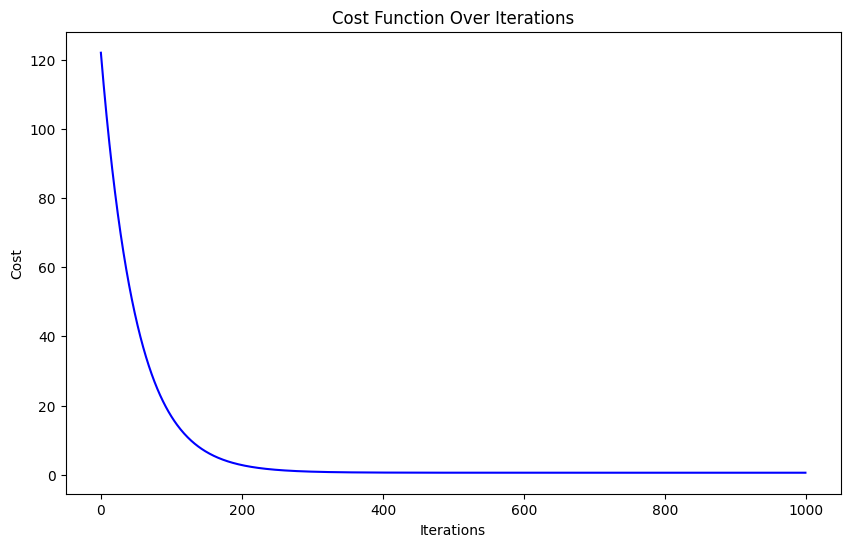

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Gradient Descent with Cost Tracking
def gradient_descent_with_cost_tracking(X, y, learning_rate, iterations):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    costs = []  # List to store costs during iterations

    for _ in range(iterations):
        y_pred = np.dot(X, weights)
        residuals = y_pred - y
        gradient = np.dot(X.T, residuals)
        weights -= learning_rate * gradient / n_samples

        # Calculating cost (mean squared error) and appending it to the list
        cost = np.mean((y_pred - y) ** 2) / (2 * n_samples)
        costs.append(cost)

    return weights, costs

# Computing the weights and tracking the cost during iterations
weights, costs = gradient_descent_with_cost_tracking(X_normalized_with_intercept, y, learning_rate, iterations)

# Plotting the cost function over iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), costs, color='b')
plt.title('Cost Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


# Regularization

7. **Regularizer Selection (Optional)**:

We can improve the training set accuracy by adding new features as transfomations of the orginal columns of the datset. For example, we can add polynomial transformations to the feature set and perform polynomial regression. Polynomial regressoin is achieved by defining the feature map as:

$$ ψ(x) = \begin{bmatrix} 1 \\ x \\ x^2 \\ x^3 \end{bmatrix}$$

The polynomial regression model can then be represented as:
$$y = w^T\psi(x)$$


The degree of the polynomial serves as a hyperparameter. Tuning this hyperparameter can be done using a validation set. However, limiting the size of the model is a simple solution and might hinder the ability to learn a more complex model, even when the data support it. An alternative approach is to maintain a large model but to regularize it.

**L2 Regularization:**

The observation is that polynomials that overfit often possess large coefficients. To encourage small weights, we can opt for the $L2$ penalty as our regularizer. Note that to be pedantic, the $L2$ norm represents the Euclidean distance. The $L2$ norm represents the Euclidean distance.

$R(w) = \frac{1}{2} \lVert w \rVert_2^2 = \frac{1}{2} \sum w_j^2$

 where $\|w\|_2^2$ is the squared L2 norm of the weight vector.

We are regularizing the squared $L2$ norm. The regularized cost function strikes a balance between the fit to the data and the norm of the weights and is given by:

$$J_{\text{reg}} = J + \lambda R = J + \frac{\lambda}{2} \sum w_j^2$$

Here, $\lambda$ serves as a hyperparameter that can be tuned using a validation set.

$J_{\text{reg}} = J + \lambda R = J + \lambda \frac{1}{2} \|w\|_2^2$,

where 'J' is the original cost function and $\lambda$ is the regularization parameter that can be tuned using a validation set.

All the derivations for the gradient descent algorithms discussed thus far remain exactly the same.

Recalling the gradient descent update:
$$w = w - \alpha \frac{\partial J}{\partial w}$$

The gradient descent update for the regularized cost has an interesting interpretation as weight decay:
$$w = w - \alpha \left( \frac{\partial J}{\partial w} + \lambda \frac{\partial R}{\partial w} \right) = w - \alpha \left( \frac{\partial J}{\partial w} + \lambda w \right) = (1 - \alpha \lambda)w - \alpha \frac{\partial J}{\partial w}$$

This interpretation illustrates that the gradient descent update accounts for weight decay, a method used to regularize or constrain the complexity of a model by adding a penalty term to the loss function. The term \($\lambda w$\) acts as a regularizing term that discourages large weights. The update rule shrinks the weight by a factor of \($1 - \alpha \lambda$\) and moves it in the direction of the **negative** gradient, scaled by the learning rate \($\alpha$\). This allows for a balance between fitting the data and preventing overfitting.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Gradient Descent with L2 Regularization
def gradient_descent_with_L2(X, y, learning_rate, iterations, l2_penalty):
    # Getting the number of samples and features from the feature matrix X
    n_samples, n_features = X.shape

    # Initializing the weights to zeros
    weights = np.zeros(n_features)

    # Performing the gradient descent for the specified number of iterations
    for _ in range(iterations):
        # Predicting the target variable using the current weights
        y_pred = np.dot(X, weights)

        # Calculating the difference between the predicted and actual target values
        residuals = y_pred - y

        # Calculating the gradient using the derivative of the mean squared error
        gradient = np.dot(X.T, residuals)

        # Updating the weights with the regularization term
        weights = (1 - learning_rate * l2_penalty) * weights - learning_rate * gradient / n_samples

    # Returning the final weights
    return weights


np.random.seed(0)

# Simulating data for 100 patients
num_patients = 100

# Creating synthetic data for features and target variable
molecular_weight = np.random.uniform(100, 500, num_patients)
solubility = np.random.uniform(0.1, 0.9, num_patients)
clinical_data = np.random.randint(1, 4, num_patients)  # 1, 2, 3 representing different clinical trial phases
patient_age = np.random.randint(18, 80, num_patients)
bioactivity = 0.5 * molecular_weight + 0.8 * solubility + 0.1 * clinical_data + np.random.normal(0, 10, num_patients)

# Creating the 2D array
data = np.column_stack((molecular_weight, solubility, clinical_data, patient_age, bioactivity))

# Column names for the features
column_names = ['Intercept', 'Molecular Weight', 'Solubility', 'Clinical Data', 'Patient Age']

# Extracting features and the target variable
X = data[:, :-1]  # Features
y = data[:, -1]  # Target variable

# Creating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Normalizing the polynomial features
X_poly_normalized = (X_poly - np.mean(X_poly, axis=0)) / np.std(X_poly, axis=0)

# Adding an intercept term by appending a column of ones to the normalized polynomial feature matrix
X_poly_normalized_with_intercept = np.c_[np.ones(X_poly_normalized.shape[0]), X_poly_normalized]

# Setting the hyperparameters
learning_rate = 0.01
iterations = 1000
l2_penalty = 0.1

# Computing the weights using the gradient descent algorithm with L2 regularization
weights_with_L2_poly = gradient_descent_with_L2(X_poly_normalized_with_intercept, y, learning_rate, iterations, l2_penalty)

# Computing the predicted y values
y_pred = np.dot(X_poly_normalized_with_intercept, weights_with_L2_poly)

# Computing the mean squared error
mse = mean_squared_error(y, y_pred)

# Computing the R-squared value
r2 = r2_score(y, y_pred)


# Printing the weights with L2 regularization for polynomial features
print("Weights using Gradient Descent with L2 Regularization for Polynomial Features:")
print(weights_with_L2_poly)

# Printing the column names and corresponding beta values with L2 regularization for polynomial features
print("Corresponding Beta Values with L2 Regularization for Polynomial Features:")
poly_column_names = poly.get_feature_names_out(input_features=column_names[1:])  # Excluding the intercept
for i in range(len(poly_column_names)):
    print(f"{poly_column_names[i]}: {weights_with_L2_poly[i+1]}")

# Printing the MSE and R-squared value
print(f"MSE: {mse}")
print(f"R-squared: {r2}")




Weights using Gradient Descent with L2 Regularization for Polynomial Features:
[131.36717379  19.58952608  -1.27101558  -1.94739389  -3.14366691
  18.21569305   6.11777138   7.75241955  12.87671188  -0.9969055
  -1.56663892  -0.53650769  -0.41757969  -4.10463796  -2.9332886 ]
Corresponding Beta Values with L2 Regularization for Polynomial Features:
Molecular Weight: 19.589526075188058
Solubility: -1.2710155834523629
Clinical Data: -1.9473938916394704
Patient Age: -3.14366691455163
Molecular Weight^2: 18.21569305119155
Molecular Weight Solubility: 6.117771382263281
Molecular Weight Clinical Data: 7.752419552549612
Molecular Weight Patient Age: 12.876711883050321
Solubility^2: -0.996905501873758
Solubility Clinical Data: -1.5666389189631296
Solubility Patient Age: -0.5365076878077755
Clinical Data^2: -0.41757968502544657
Clinical Data Patient Age: -4.10463795587623
Patient Age^2: -2.933288596715273
MSE: 289.621832695148
R-squared: 0.9177634200408618


# Introduction to Neural Networks

## Overview
Neural networks, inspired by the human brain's structure and functionality, are a powerful class of machine learning models used for a variety of tasks, including pattern recognition, classification, regression, and more. With their ability to learn complex relationships from data, neural networks have become a fundamental tool in the field of artificial intelligence. In this lecture, we will explore the basics of neural networks, their architecture, training process, and various types, providing a comprehensive understanding of their inner workings and applications.

## What is a Neural Network?
A neural network is a computational model composed of interconnected nodes (neurons) organized in layers. Each neuron processes input data, applies an activation function, and passes the output to the next layer. The strength of neural networks lies in their capability to learn intricate patterns and relationships from data, enabling them to make predictions, classifications, and decisions.

## Neural Network Architecture
1. Input Layer: The initial layer that receives the input data.
2. Hidden Layers: Intermediate layers that process data through weighted connections and apply non-linear transformations.
3. Output Layer: The final layer that produces the network's output.

## Neural Network Training Process
1. Forward Propagation: Input data is fed through the network, and computations occur layer by layer until the output is generated.
2. Loss Calculation: The discrepancy between the predicted output and the actual output is computed using a predefined loss function.
3. Backward Propagation (Backpropagation): The gradients of the loss function with respect to the network's parameters are calculated. These gradients are used to adjust the weights and biases in the network to minimize the loss function.
4. Optimization: Various optimization algorithms, such as gradient descent and its variants, are used to update the network's parameters iteratively, aiming to find the optimal values that minimize the loss function.

## Types of Neural Networks
1. Feedforward Neural Networks (FNNs): Basic neural networks where data flows only in one direction, from the input to the output.
2. Convolutional Neural Networks (CNNs): Specialized for processing grid-structured data, such as images, using convolutional and pooling layers.
3. Recurrent Neural Networks (RNNs): Designed to handle sequential data by retaining information in the form of hidden states, allowing them to learn temporal dependencies.
4. Long Short-Term Memory Networks (LSTMs): A type of RNN that can capture long-term dependencies and mitigate the vanishing gradient problem.
5. Generative Adversarial Networks (GANs): Comprising a generator and a discriminator, GANs are used to generate new data instances that resemble the training data.



# Structure of Neural Networks

The artificial neuron has N inputs, each denoted as $u_1, u_2, ..., u_N,$ with corresponding weights $w_1, w_2, ..., w_N$ representing the synaptic connections in biological neurons. The threshold, typically denoted as θ, is used to determine whether the neuron fires or not. The activation of the neuron is determined by the formula:

$$z = \sum_{j=1}^{N} w_j u_j + \theta $$

In vector notation:
$$z = w^Tu + \theta$$

In the context of the artificial neuron model, a negative weight indicates an inhibitory connection, while a positive weight indicates an excitatory one. The threshold θ may be assigned a positive value, known as bias. Sometimes, for mathematical convenience, the threshold is combined into the summation part by assuming an imaginary input \($u_0 = 1$\) and a connection weight \($w_0 = \theta\$), leading to the simplified activation formula:c

$z = \sum_{j=0}^{N} w_j u_j $


The output of the neuron, denoted by \(x\), is determined by a function of the activation, \(f(a)\), which can take various forms such as the threshold function, linear function, ramp function, sigmoid function or ReLU function.


1. Linear: The linear function is denoted as $$f(a) = \kappa a,$$

    where \($\kappa$\) is a constant.

2. Threshold: The threshold function is defined as follows:
  $$
   f(z) = \begin{cases}
            0 & \text{if } z \leq 0, \\
            1 & \text{if } z > 0
          \end{cases}
  $$
   It effectively acts as a step function, producing a binary output based on whether the activation is greater than zero or not.

3. Ramp: The ramp function is defined as:
   $$
   f(z) = \begin{cases}
            0 & \text{if } z \leq 0, \\
            z & \text{if } 0 < z < 1, \\
            1 & \text{if } z \geq 1
          \end{cases}
   $$

4. Sigmoid: The sigmoid function is expressed as:
  $$
   f(z) = \frac{1}{1 + e^{-\kappa z}}
   $$
   where \(\kappa\) is a constant. The sigmoid function is commonly used in neural networks for its smooth, S-shaped curve that allows for gradient-based optimization during training.

5. ReLU (Rectified Linear Unit): The ReLU function is represented as:
   
  $$
   f(z) = \max(0, z)
  $$

   The ReLU function returns the input directly if it is positive and zero otherwise. This function helps address the vanishing gradient problem and allows the network to learn complex patterns and relationships in the data. It is widely used in many deep learning models due to its simplicity and effectiveness.

A **neural network** is formed by connecting the outputs of multiple artificial neurons to create a complex system capable of implementing various functions. In this network, each neuron is assigned an index to distinguish it from others. The activation of the \(i\)th neuron is expressed using the modified formula:

$$z_i = \sum_{j=1}^{N} w_{ji}x_j + \theta_i $$

Here, \($x_j$\) can either represent the output of another neuron, determined as \($x_j = f(z_j$)\) or an external input represented by \($u_j$\).

The components in this formula are as follows:

- $z_i$ is the activation of the $i$th neuron in the network.
- $w_{ji}$ denotes the weight associated with the connection between the $j$th neuron and the $i$th neuron.
- $x_j$ represents either the output of the $j$th neuron or an external input, as described earlier.
- $\theta_i$ is the threshold associated with the $i$th neuron.

This modification allows for the consideration of the outputs of other neurons within the network as inputs for a given neuron. By interconnecting multiple artificial neurons in this manner, complex computations and functions can be implemented, overcoming the limitations of a single artificial neuron in performing certain tasks.

For the neural network, a state vector $x$ is defined, where the $i$th component represents the output of the $i$th neuron, denoted as $x_i$. Additionally, a weight matrix $W$ is defined, where the component $w_{ji}$ represents the weight of the connection from neuron $j$ to neuron $i$. With these definitions, the system can be represented as:

$$z = f(W^T \cdot x + \theta)$$

Here, $\theta$ is the vector whose $i$th component is $\theta_i$, and $f$ is used to denote the vector function, where $f_i$ is applied to the $i$th component of the vector. This representation captures the dynamics of the neural network, where $a_i$ of each neuron is determined based on the weighted sum of the inputs, including the threshold values, and the application of the respective transfer functions. This formulation allows for the analysis and understanding of the behavior of the neural network as a whole.


In the context of neural networks, the training process involves adjusting the weights and biases to minimize the error between the predicted output and the actual output. The process typically involves the following steps:

1. **Forward Propagation**: During forward propagation, the inputs are fed into the network, and the network computes the activations and outputs of each neuron successively using the provided formulas.

    The activation of the \(i\)th neuron is determined by the formula:
    \[a_i = \sum_{j=1}^{N} w_{ji}x_j + \theta_i\]
    where \(x_j\) can either represent the output of another neuron, \(x_j = f(a_j)\), or an external input represented by \(u_j\).

2. **Activation Function Application**: After the forward propagation step, the output of each neuron is passed through an activation function to introduce non-linearity into the network. Various activation functions can be used, such as the linear function, threshold function, ramp function, sigmoid function, or ReLU function, based on the requirements of the problem and the desired properties of the network.

3. **Error Computation**: Once the network generates the output, the error between the predicted output and the actual output is calculated using a suitable error function, such as mean squared error or cross-entropy loss.

4. **Backward Propagation (Backpropagation)**: Backpropagation is the process of calculating the gradients of the error with respect to the weights and biases of the network. This process helps in understanding how a change in each weight and bias influences the overall error. These gradients are then used to update the weights and biases in a way that minimizes the error.

5. **Update Weights and Biases**: The weights and biases are updated using optimization techniques such as gradient descent, stochastic gradient descent, or their variants. These methods help adjust the parameters in a way that moves the network in the direction of minimizing the error.

6. **Iterations**: Steps 1 to 5 are iterated multiple times, with the network making gradual adjustments to the weights and biases to minimize the error. The number of iterations depends on the complexity of the problem, the size of the dataset, and the convergence criteria set by the user.

By iteratively adjusting the weights and biases through forward and backward propagation, the neural network can learn the underlying patterns and relationships in the data and improve its predictive capabilities. The trained network can then be used to make predictions on new, unseen data.

In [1]:
import numpy as np

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Generating synthetic data
np.random.seed(0)
X = np.random.rand(1000, 4)  # Input features
y = np.random.rand(1000, 1)  # Target variable

# Initialize weights randomly with mean 0
input_size = 4
hidden_size = 5
output_size = 1

weights_input_hidden = np.random.uniform(size=(input_size, hidden_size))  # Weights from input to hidden layer
weights_hidden_output = np.random.uniform(size=(hidden_size, output_size))  # Weights from hidden to output layer

# Hyperparameters
learning_rate = 0.1
epochs = 1000

# Training the neural network
for epoch in range(epochs):
    # Forward Propagation
    hidden_layer_input = np.dot(X, weights_input_hidden)  # Computing the input to the hidden layer
    hidden_layer_output = sigmoid(hidden_layer_input)  # Applying the activation function to the hidden layer input

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)  # Computing the input to the output layer
    predicted_output = sigmoid(output_layer_input)  # Applying the activation function to the output layer input

    # Backpropagation
    error = y - predicted_output  # Calculating the error between the predicted and actual output
    d_predicted_output = error * sigmoid_derivative(predicted_output)  # Calculating the derivative of the predicted output

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)  # Calculating the error at the hidden layer
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)  # Calculating the derivative at the hidden layer

    # Updating Weights
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate  # Updating weights between hidden and output layers
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate  # Updating weights between input and hidden layers

# Printing the final predicted output
print("Predicted Output after Training:")
#print(predicted_output)


Predicted Output after Training:


In [ ]:
import numpy as np

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(1000, 4)  # 1000 data points with 4 features
weights_input_hidden = np.random.rand(4, 5)  # Weight matrix from input to hidden layer
weights_hidden_output = np.random.rand(5, 1)  # Weight matrix from hidden to output layer
bias_hidden = np.random.rand(1, 5)  # Bias for the hidden layer
bias_output = np.random.rand(1)  # Bias for the output layer
y = np.random.rand(1000, 1)  # Target variable

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward propagation
hidden_layer_activation = np.dot(X, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_activation)
output_layer_activation = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_activation)

# Error computation
error = np.mean((predicted_output - y) ** 2)

# Backward propagation (Backpropagation) - Assuming a simple update rule for demonstration
output_error = (predicted_output - y) * (predicted_output * (1 - predicted_output))
hidden_error = np.dot(output_error, weights_hidden_output.T) * (hidden_layer_output * (1 - hidden_layer_output))

# Gradient descent - Assuming a simple learning rate for demonstration
learning_rate = 0.1
weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, output_error)
weights_input_hidden -= learning_rate * np.dot(X.T, hidden_error)
bias_output -= learning_rate * np.sum(output_error)
bias_hidden -= learning_rate * np.sum(hidden_error)

# Iterations - Repeat the process for multiple iterations
num_iterations = 100
for i in range(num_iterations):
    # Forward propagation
    hidden_layer_activation = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_activation)
    output_layer_activation = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_activation)

    # Backward propagation
    output_error = (predicted_output - y) * (predicted_output * (1 - predicted_output))
    hidden_error = np.dot(output_error, weights_hidden_output.T) * (hidden_layer_output * (1 - hidden_layer_output))

    # Gradient descent
    weights_hidden_output -= learning_rate * np.dot(hidden_layer_output.T, output_error)
    weights_input_hidden -= learning_rate * np.dot(X.T, hidden_error)
    bias_output -= learning_rate * np.sum(output_error)
    bias_hidden -= learning_rate * np.sum(hidden_error)

    # Error computation
    error = np.mean((predicted_output - y) ** 2)
    if (i + 1) % 10 == 0:
        print(f"Iteration {i + 1}, Error: {error:.4f}")

# Final predictions
print("\nFinal Predictions:")
print(predicted_output)

# Binary Cross Entropy
Binary Cross Entropy (BCE) is a widely used loss function for binary classification tasks. It measures the difference between the predicted probability distribution and the actual binary label. BCE is particularly useful when dealing with binary classification problems where the task is to predict whether an instance belongs to one class or another.

The Binary Cross Entropy loss function is based on the concept of information entropy from information theory. It quantifies the difference between two probability distributions, the true distribution and the predicted distribution. It penalizes the model more for larger differences between the predicted and actual values, making it a suitable choice for training models in binary classification tasks.

The formula for BCE is:

$$BCE = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)]$$

where $N$ is the number of observations, $y_i$ is the actual value (0 or 1), and $\hat{y}_i$ is the predicted probability.

It is important to note that the BCE penalizes the model logarithmically for misclassifications. Specifically, it heavily penalizes high-confidence incorrect predictions and low-confidence incorrect predictions, while barely penalizing high-confidence correct predictions. This characteristic makes it a well-suited loss function for binary classification problems, ensuring that the model learns to predict probabilities as close to the true labels as possible.

Now, let's calculate the Binary Cross Entropy for a subset of 5 observations using the provided table.

Here is the modified table with 5 observations:

| Observation Number | Actual Value (0 or 1) | Predicted Probability |
|--------------------|-----------------------|-----------------------|
| 1                  | 0                     | 0.3                   |
| 2                  | 1                     | 0.7                   |
| 3                  | 0                     | 0.4                   |
| 4                  | 1                     | 0.6                   |
| 5                  | 1                     | 0.8                   |

Now, let's calculate the Binary Cross Entropy (BCE) for these 5 observations using the formula:

$$BCE = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)]$$

where $N$ is the number of observations, $y_i$ is the actual value (0 or 1), and $\hat{y}_i$ is the predicted probability.

For the first observation:

$$BCE_1 = -[0 \cdot \log(0.3) + (1 - 0) \cdot \log(1 - 0.3)]$$

For the second observation:

$$BCE_2 = -[1 \cdot \log(0.7) + (1 - 1) \cdot \log(1 - 0.7)]$$

For the third observation:

$$BCE_3 = -[0 \cdot \log(0.4) + (1 - 0) \cdot \log(1 - 0.4)]$$

For the fourth observation:

$$BCE_4 = -[1 \cdot \log(0.6) + (1 - 1) \cdot \log(1 - 0.6)]$$

For the fifth observation:

$$BCE_5 = -[1 \cdot \log(0.8) + (1 - 1) \cdot \log(1 - 0.8)]$$

After calculating the BCE for each observation, we can take the average of all the $BCE$ values to obtain the overall Binary Cross Entropy.

In [ ]:
import numpy as np

# Define the data
data = np.array([
    [0, 0.3],
    [1, 0.7],
    [0, 0.4],
    [1, 0.6],
    [1, 0.8]
])

# Extract the actual values and predicted probabilities
y = data[:, 0]
y_hat = data[:, 1]

# Calculate the BCE for each observation
BCE = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# Print the results
print("Binary Cross Entropy (BCE):", BCE)


Binary Cross Entropy (BCE): 0.3916289373447312


# Cross Entropy Loss

The Binary Cross Entropy (BCE) loss function is used for binary classification problems, where the goal is to predict whether an instance belongs to one class or another. If the softmax function is used for multi-class classification with $m$ classes, the Cross Entropy Loss (CE) is typically employed, which is an extension of the BCE for the multi-class case.

The Cross Entropy Loss for multi-class classification with the softmax function is expressed as follows:

$CE(y, \hat{y}) = - \frac{1}{N}\sum_{i=1}^{m} y_i \log(\hat{y}_i)$

where:
- $N$ is the number of observations.
- $y$ is a one-hot encoded vector representing the true class label, with $m$ elements where all elements are 0 except for the true class label, which is 1.
- $\hat{y}$ is the vector of predicted probabilities for each class, obtained using the softmax function. It represents the probability distribution over the $m$ classes.

The Cross Entropy Loss penalizes the model based on the difference between the true distribution ($y$) and the predicted distribution ($\hat{y}$). It aims to minimize the difference between the predicted probabilities and the true labels. The model tries to improve by adjusting its parameters to reduce the Cross Entropy Loss, thereby increasing the accuracy of the predictions.

Let's consider an example with 5 observations and 3 classes for the Cross Entropy loss calculation. We denote the actual one-hot encoded labels as $y$ and the predicted probability distributions as $\hat{y}$.

Suppose we have the following data:

Observation 1: $\mathbf{y} = [1, 0, 0]$, $\hat{\mathbf{y}} = [0.7, 0.2, 0.1]$

Observation 2: $\mathbf{y} = [0, 1, 0]$, $\hat{\mathbf{y}} = [0.3, 0.5, 0.2]$

Observation 3: $\mathbf{y} = [0, 0, 1]$, $\hat{\mathbf{y}} = [0.2, 0.1, 0.7]$

Observation 4: $\mathbf{y} = [1, 0, 0]$, $\hat{\mathbf{y}} = [0.4, 0.4, 0.2]$

Observation 5: $\mathbf{y} = [0, 1, 0]$, $\hat{\mathbf{y}} = [0.2, 0.6, 0.2]$

Let's plug these values into the Cross Entropy loss formula for each observation:

Observation 1:
$CE_1 = -\sum_{i=1}^{3} y_{1i} \log(\hat{y}_{1i}) = -1 \cdot \log(0.7) = -\log(0.7)$

Observation 2:
$CE_2 = -\sum_{i=1}^{3} y_{2i} \log(\hat{y}_{2i}) = -1 \cdot \log(0.5) = -\log(0.5)$

Observation 3:
$CE_3 = -\sum_{i=1}^{3} y_{3i} \log(\hat{y}_{3i}) = -1 \cdot \log(0.7) = -\log(0.7)$

Observation 4:
$CE_4 = -\sum_{i=1}^{3} y_{4i} \log(\hat{y}_{4i}) = -1 \cdot \log(0.4) = -\log(0.4)$

Observation 5:
$CE_5 = -\sum_{i=1}^{3} y_{5i} \log(\hat{y}_{5i}) = -1 \cdot \log(0.6) = -\log(0.6)$

After calculating the CE for each observation, we can take the average of all the $CE$ values to obtain the overall Cross Entropy.

In [ ]:
import numpy as np

# True labels (one-hot encoded)
y = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [1, 0, 0],
              [0, 1, 0]])

# Predicted probabilities
y_hat = np.array([[0.7, 0.2, 0.1],
                  [0.3, 0.5, 0.2],
                  [0.2, 0.1, 0.7],
                  [0.4, 0.4, 0.2],
                  [0.2, 0.6, 0.2]])

# Compute Cross Entropy loss for each observation
CE_loss = -np.sum(y * np.log(y_hat), axis=1)

# Overall Cross Entropy
print(f"Overall Cross Entropy: CE = {np.mean(CE_loss)}")


Overall Cross Entropy: CE = 0.5667226848155111


# Backpropagation Algorithm

The backpropagation algorithm is a fundamental technique in training artificial neural networks. It involves two distinct passes, the forward pass and the backward pass, through the layers of the network.

# Summary of the Algorithm
1. **Forward Pass:**
   - The input data is propagated through the network, layer by layer, using the current weights and biases.
   - For each neuron, the input is multiplied by the weights, and the bias is added. Then, the activation function is applied to the result to generate the output of that neuron.
   - The output of the last layer is compared with the actual labels to compute the error.

2. **Backward Pass:**
   - The error is propagated backward through the network. This involves calculating the gradients of the error with respect to the weights and biases.
   - Using the chain rule of calculus, the error at the output layer is used to compute the error at the previous layers, and so on until the first layer.
   - The gradients are used to update the weights and biases to minimize the error. This is usually done using optimization techniques like gradient descent or its variants.

3. **Iterations:**
   - The forward and backward passes are repeated multiple times for different data points in the training dataset.
   - The weights and biases are updated after each iteration to minimize the overall error.
   - The process is repeated until a stopping criterion is met, which could be a maximum number of iterations or a threshold for the error.

Additionally, it's crucial to preprocess the data and normalize it appropriately for numerical prediction tasks. This can ensure that the output values are within a reasonable range and help improve the performance of the network.

## Details of Algorithm:

Let's assume we have a single hidden layer with $n_{\text{hidden}}$ neurons and an output layer.

1. **Forward Pass:**
   
   For the $i$-th neuron in the hidden layer, the weighted sum is calculated as:
   
   $$z_i^{(\text{hidden})} = \sum_{j=1}^{n_{\text{in}}} w_{ij}^{(\text{hidden})}x_j^{(\text{in})} + \theta_i^{(\text{hidden})}$$
   

  where
  $z_i^{(\text{hidden})}$ is the input of the $i$th hidden node before the activation function is applied.
  $w_{ij}^{(\text{hidden})}$ is the weight for the $j$th input node value for the $i$th hidden node.
  $x_j^{(\text{in})}$ is the $j$th input node value.
  $\theta_i^{(\text{hidden})}$  is the bias for the $i$th hidden node.

   Then, the activation function $f$ is applied. The activation function gives the outupt of the hidden layer which are the inputs to the output layer. The activation function could be different depending on the type of problem:
   
   - For classification problems, the commonly used activation function is the sigmoid function:
     
     $$a_i^{(\text{hidden})} = \frac{1}{1 + e^{-z_i^{(\text{hidden})}}}$$
     
   - For continuous prediction problems, the identity function is used as the activation function:
     
     $$a_i^{(\text{hidden})} = z_i^{(\text{hidden})}$$

   
   The number of nodes in the output layer, denoted as $n_{\text{out}}$, depends on the specific problem we are trying to solve. his number is determined by the requirements of the task at hand.
- For a binary classification problem, you typically have a single node in the output layer, as the network is predicting the probability of belonging to one of the two classes.

- For multi-class classification problems, the number of nodes in the output layer is equal to the number of classes you want to classify.

- For regression problems, where you are predicting continuous values, you might have a single node in the output layer.
   
   
In the case of **single-node** the output layer:

a. For regression problems we have:
   
  $$z^{(\text{out})} = \sum_{i=1}^{n_{\text{hidden}}} w_i^{(\text{out})}a_i^{(\text{hidden})} + \theta^{(\text{out})}$$

   - For binary classification problems, if we are using a sigmoid activation function, then the output is given by:
     
     $$y = \frac{1}{1 + e^{-z^{(\text{out})}}}$$
     
   - For continuous prediction problems, the output of the network directly becomes the predicted value:
     
     $$y = z^{(\text{out})}$$

For multi-class classification problems, we have to take the number of classes to be the number of the output layer nodes.

 $$z_i^{(\text{out})} = \sum_{i=1}^{n_{\text{hidden}}} w_{ij}^{(\text{out})} a_i^{(\text{hidden})} + \theta_i^{(\text{out})}$$

Then, we have to use the softmax activation function. The probability of each class $j$ is given by:


$$P(y=j|z) = \frac{e^{z_j}}{\sum_{i=1}^{n_{\text{out}}} e^{z_i}}$$

2. **Backward Pass:**

The error function $E$ represents the discrepancy between the predicted output and the actual target values. The specific form of the error function depends on the task at hand, whether it's a classification problem or a regression problem.

- For regression problems, where the goal is to predict a continuous numerical value, a commonly used error function is the Mean Squared Error (MSE). The MSE for a single prediction can be defined as:

  $$E = \frac{1}{2N_{\text{obs}}}\sum_{i=1}^{n_{\text{obs}}}(y^{(i)} - t^{(i)})^2$$

   where **$n_{\text{obs}}$ is the number of data-points**, $t^{(i)}$ is the actual value, and $y^{(i)}$ is the predicted value for the data point $i$.

- For the binary classification problems, where the goal is to assign a class label to the input data, a commonly used error function is the Cross-Entropy Loss. For a binary classification problem, the cross-entropy loss can be defined as:

   $$E = -\frac{1}{N_{\text{obs}}}\sum_{i=1}^{n_{\text{obs}}}\left({t}^{(i)}\log(y^{(i)}) + (1 - {t}^{(i)})\log(1 - y^{(i)})\right)$$

   where **$n_{\text{obs}}$ is the number of data-points**, ${t}^{(i)}$ is the actual value, and $y^{(i)}$ is the predicted value for the data-point $i$.

- For multi-class classification problems, the Cross Entropy Loss can be deifined as follows:

$$E= - \frac{1}{N_{\text{obs}}} \sum_{i=1}^{n_{\text{obs}}} \sum_{j=1}^{m} t_{j}^{(i)} \log(y_j^{(i)})$$

  where **$n_{\text{obs}}$ is the number of data-points**, $t_{j}^{(i)}$ is the actual value for class j for the data-point $i$, and $y_j^{(i)}$ is the predicted value.

Now we have to find the gradient for each weight and bias for each data-point. Let's assume a binary classification problem. Before we calculate the gradient let's find the derivatives of the activation function (Sigmoid function) and the error function (Binary Cross Entropy Loss).


The first derivative of the Sigmoid function [$\sigma(x)$]:

$$\frac{d \sigma(z)}{dz} = \sigma(z) \cdot (1 - \sigma(z))$$


The first derivative of the Binary Cross Entropy Loss [$ -(t\log(y) + (1 - t)\log(1 - y)$]:

$$
\frac{d E}{dy} = - \bigg( \frac{t} {y} - \frac{(1 - t)}{(1 - y)} \bigg)
$$


## For the weights in the output layer:
     
$$\frac{\partial E}{\partial w_i^{(\text{out})}} = \frac{\partial E}{\partial y} \frac{\partial y}{\partial z^{(\text{out})}} \frac{\partial z^{(\text{out})}}{\partial w_{i}^{(\text{out})}} \\
\quad = - \Bigg[\bigg( \frac{t} {y} - \frac{(1 - t)}{(1 - y)} \bigg) \Bigg] \Bigg[\bigg(\frac{1}{1 + e^{-z_i^{(\text{out})}}} \bigg) \bigg(1- \bigg(\frac{1}{1 + e^{-z^{(\text{out})}}} \bigg) \bigg) \Bigg] a_{i}^{(\text{hidden})}
$$

## For the biases in the output layer:
     
$$\frac{\partial E}{\partial \theta^{(\text{out})}} = \frac{\partial E}{\partial y} \frac{\partial y}{\partial z^{(\text{out})}} \frac{\partial z^{(\text{out})}}{\partial \theta^{(\text{out})}} \\
\quad = - \Bigg[\bigg( \frac{t} {y} - \frac{(1 - t)}{(1 - y)} \bigg) \Bigg] \Bigg[\bigg(\frac{1}{1 + e^{-z_i^{(\text{out})}}} \bigg) \bigg(1- \bigg(\frac{1}{1 + e^{-z^{(\text{out})}}} \bigg) \bigg) \Bigg] \cdot 1
$$

## For the weights in the hidden layer:
     
$$
\frac{\partial E}{\partial w_{ij}^{(\text{hidden})}} \\
= \frac{\partial E}{\partial y} \frac{\partial y}{\partial z^{(\text{out})}} \frac{\partial z^{(\text{out})}}{\partial a_{i}^{(\text{hidden})}} \frac{\partial a_i^{(\text{hidden})}}{\partial z_{i}^{(\text{hidden})}} \frac{\partial z_i^{(\text{hidden})}}{\partial w_{ij}^{(\text{hidden})}} \\
\quad = \frac{\partial E}{\partial z^{(\text{out})}} w_{ij}^{(\text{out})} x_{j}
$$


## For the biases in the hidden layer:

$$
\frac{\partial E}{\partial \theta_i^{(\text{hidden})}} = \frac{\partial E}{\partial z_i^{(\text{hidden})}} \frac{\partial z_i^{(\text{hidden})}}{\partial \theta_i^{(\text{hidden})}} \\
= \frac{\partial E}{\partial y} \frac{\partial y}{\partial z^{(\text{out})}} \frac{\partial z^{(\text{out})}}{\partial z_{i}^{(\text{hidden})}} \frac{\partial z_i^{(\text{hidden})}}{\partial \theta_{i}^{(\text{hidden})}} \\
\quad = \frac{\partial E} {\partial z^{(\text{out})}} w_{ij}^{(\text{out})} \cdot 1
$$


Where:
- $E$ is the error function.
- $\alpha$ is the learning rate.
- $w_{ij}^{(\text{hidden})}$ and $w_i^{(\text{out})}$ are the weights of the hidden and output layers, respectively.
- $\theta_i^{(\text{hidden})}$ and $\theta^{(\text{out})}$ are the biases of the hidden and output layers, respectively.

3. **Iterations:**

   Update the weights and biases using an optimization technique such as gradient descent:
     
     $$w_{\text{new}} = w_{\text{old}} - \alpha \frac{\partial E}{\partial w}$$
     $$\theta_{\text{new}} = \theta_{\text{old}} - \alpha \frac{\partial E}{\partial \theta}$$


## Vectorization for Performance
 We can express the forward pass and the backward pass using matrix notation.

1. **Forward Pass:**

Let's denote the weight matrices and bias vectors as follows:

- Input vector: ${x}^{(\text{in})} = [x_1^{(\text{in})}, x_2^{(\text{in})}, x_3^{(\text{in})}, ..., x_{n_{\text{in}}}^{(\text{in})}]$.
- Weight column vector for the hidden layer $i$: $w_i^{(\text{hidden})} = [w_{i1}^{(\text{hidden})}, w_{i2}^{(\text{hidden})}, w_{i3}^{(\text{hidden})}, ...,w_{i{n_{\text{in}}}}^{(\text{hidden})}]^T$
- Weight matrix for the hidden layer: $W^{(\text{hidden})} = [w_{1}^{(\text{hidden})}, w_{2}^{(\text{hidden})}, w_{3}^{(\text{hidden})}, ..., w_{n_{\text{hidden}}}^{(\text{hidden})}]$.
- Bias vector for the hidden layer: $\theta^{(\text{hidden})} = [\theta_i^{(\text{hidden})}]$.
- Weight vector for the single node output layer: $w^{(\text{out})} = [w_i^{(\text{out})}]$.
- Bias scalar for the single node output layer: $\theta^{(\text{out})}$.


The forward pass for the hidden layer can be represented as:
   
   $$z^{(\text{hidden})} = W^{(\text{hidden})} \cdot x + \theta^{(\text{hidden})}$$
   
   Then applying the activation function, we get:
   
   $$x^{(\text{hidden})} = f(z^{(\text{hidden})})$$
   
   The forward pass for the output layer is:
   
   $$y = w^{(\text{out})} \cdot x^{(\text{hidden})} + \theta^{(\text{out})}$$

2. **Backward Pass:**

   The gradients for the weights and biases in the backward pass can be represented as:
   
   - For the weights in the output layer:
     
     $$\frac{\partial E}{\partial w^{(\text{out})}} = \frac{\partial E}{\partial y} \cdot \frac{\partial y}{\partial z^{(\text{out})}} \cdot \frac{\partial z^{(\text{out})}}{\partial w^{(\text{out})}}$$
     
   - For the biases in the output layer:
     
     $$\frac{\partial E}{\partial \theta^{(\text{out})}} = \frac{\partial E}{\partial y} \cdot \frac{\partial y}{\partial z^{(\text{out})}} \cdot \frac{\partial z^{(\text{out})}}{\partial \theta^{(\text{out})}}$$
   
   - For the weights in the hidden layer:
     
     $$\frac{\partial E}{\partial w^{(\text{hidden})}} = \frac{\partial E}{\partial z^{(\text{hidden})}} \cdot \frac{\partial z^{(\text{hidden})}}{\partial w^{(\text{hidden})}}$$
   
   - For the biases in the hidden layer:
     
     $$\frac{\partial E}{\partial \theta^{(\text{hidden})}} = \frac{\partial E}{\partial z^{(\text{hidden})}} \cdot \frac{\partial z^{(\text{hidden})}}{\partial\theta^{(\text{hidden})}}$$

3. **Iterations:**

   Update the weights and biases using the gradients and the learning rate ($\alpha$):
   
   $$w^{(\text{hidden})}_{\text{new}} = w^{(\text{hidden})}_{\text{old}} - \alpha \frac{\partial E}{\partial w^{(\text{hidden})}}$$
   
   $$\theta^{(\text{hidden})}_{\text{new}} = \theta^{(\text{hidden})}_{\text{old}} - \alpha \frac{\partial E}{\partial \theta^{(\text{hidden})}}$$
   
   $$w^{(\text{out})}_{\text{new}} = w^{(\text{out})}_{\text{old}} - \alpha \frac{\partial E}{\partial w^{(\text{out})}}$$
   
   $$\theta^{(\text{out})}_{\text{new}} = \theta^{(\text{out})}_{\text{old}} - \alpha \frac{\partial E}{\partial \theta^{(\text{out})}}$$

Here, $z^{(\text{hidden})}$ and $x^{(\text{hidden})}$ are vectors of the hidden layer's weighted sums and its activations, respectively. The function $f$ is the activation function applied element-wise. The error function $E$ depends on the specific problem and can be defined accordingly.

Confusion Matrix:
[[ 43  23]
 [ 30 904]]
Overall Accuracy: 0.947


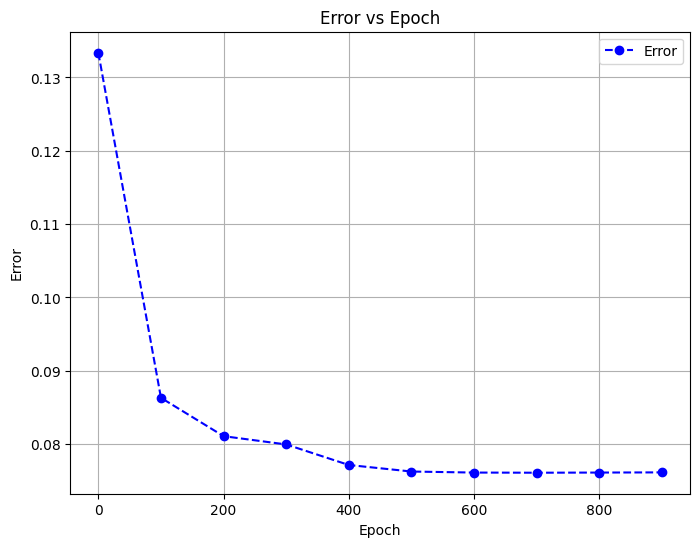

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate independent input data
np.random.seed(1)
feature1 = np.random.rand(1000)
feature2 = np.random.rand(1000)
feature3 = np.random.rand(1000)
X = np.column_stack((feature1, feature2, feature3))

# Generate correlated output data
y = (1 / (1 + np.exp(-(0.3 * feature1 + 0.5 * feature2 - 0.2 * feature3 + np.random.normal(0, 0.1, 1000)))) > 0.5).astype(int)
y = y.reshape(-1, 1)

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def binary_cross_entropy_derivative(y, t):
    """
    Compute the derivative of the Binary Cross Entropy Loss with respect to y.

    Args:
    y (numpy.ndarray): Predicted output.
    t (numpy.ndarray): True labels.

    Returns:
    numpy.ndarray: Derivative of the Binary Cross Entropy Loss.
    """
    return -((t / y) - ((1 - t) / (1 - y)))

# Initialize weights and biases
input_dim, hidden_dim, output_dim = 3, 5, 1
weights_input_hidden = np.random.rand(input_dim, hidden_dim)
bias_hidden = np.random.rand(1, hidden_dim)
weights_hidden_output = np.random.rand(hidden_dim, output_dim)
bias_output = np.random.rand(1, output_dim)

# Hyperparameters
learning_rate, epochs = 0.1, 1000
epoch_list, error_list = [], []

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden # Calculate input to the hidden layer
    hidden_layer_output = sigmoid(hidden_layer_input) # Apply activation function to the hidden layer
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output # Calculate input to the output layer
    predicted_output = sigmoid(output_layer_input) # Apply activation function to the output layer

    # Backpropagation
    error = y - predicted_output # Compute the error
    d_predicted_output = error * sigmoid_derivative(predicted_output) # Compute the derivative of the error with respect to the predicted output
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T) # Compute the error in the hidden layer
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output) # Compute the derivative of the error with respect to the hidden layer

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate # Update the weights between the hidden and output layers
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate # Update the bias of the output layer
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate # Update the weights between the input and hidden layers
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate # Update the bias of the hidden layer

    # Record and print the error at every 100 epochs
    if epoch % 100 == 0:
        epoch_list.append(epoch)
        error_list.append(np.mean(np.abs(error)))

# Final predictions
threshold = 0.5
predicted_classes = (predicted_output > threshold).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y, predicted_classes)

# Calculate the overall accuracy
overall_accuracy = np.trace(cm) / np.sum(cm)

# Print the confusion matrix and overall accuracy
print("Confusion Matrix:")
print(cm)
print(f"Overall Accuracy: {overall_accuracy}")

# Plotting the error
plt.figure(figsize=(8, 6))
plt.plot(epoch_list, error_list, marker='o', linestyle='--', color='b', label='Error')
plt.title('Error vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()


Confusion Matrix:
[[ 43  23]
 [ 30 904]]
Overall Accuracy: 0.947


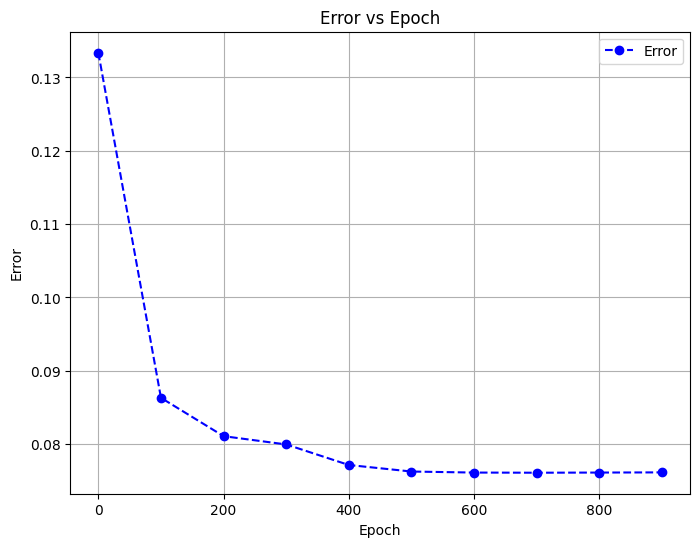

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Generate independent input data
np.random.seed(1)
feature1 = np.random.rand(1000)
feature2 = np.random.rand(1000)
feature3 = np.random.rand(1000)
X = np.column_stack((feature1, feature2, feature3))

# Generate correlated output data
y = (1 / (1 + np.exp(-(0.3 * feature1 + 0.5 * feature2 - 0.2 * feature3 + np.random.normal(0, 0.1, 1000)))) > 0.5).astype(int)
y = y.reshape(-1, 1)

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def bce_derivative(y, t):
    """
    Compute the derivative of the Binary Cross Entropy Loss with respect to y.

    Args:
    y (numpy.ndarray): Predicted output.
    t (numpy.ndarray): True labels.

    Returns:
    numpy.ndarray: Derivative of the Binary Cross Entropy Loss.
    """
    return -((t / y) - ((1 - t) / (1 - y)))

# Initialize weights and biases
input_dim, hidden_dim, output_dim = 3, 5, 1
weights_input_hidden = np.random.rand(input_dim, hidden_dim)
bias_hidden = np.random.rand(1, hidden_dim)
weights_hidden_output = np.random.rand(hidden_dim, output_dim)
bias_output = np.random.rand(1, output_dim)

# Hyperparameters
learning_rate, epochs = 0.1, 1000
epoch_list, error_list = [], []

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden # Calculate input to the hidden layer
    hidden_layer_output = sigmoid(hidden_layer_input) # Apply activation function to the hidden layer
    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output # Calculate input to the output layer
    predicted_output = sigmoid(output_layer_input) # Apply activation function to the output layer

    # Backpropagation
    error = y - predicted_output # Compute the error
    d_predicted_output = bce_derivative(predicted_output) # Compute the derivative of the error with respect to the predicted output
    d_output_layer_input = bce_derivative(predicted_output) * sigmoid_derivative(hidden_layer_input) # Compute the derivative of the error with respect to the output layer inputs
   # error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T) # Compute the error in the hidden layer

    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output) # Compute the derivative of the error with respect to the hidden layer

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate # Update the weights between the hidden and output layers
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate # Update the bias of the output layer
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate # Update the weights between the input and hidden layers
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate # Update the bias of the hidden layer

    # Record and print the error at every 100 epochs
    if epoch % 100 == 0:
        epoch_list.append(epoch)
        error_list.append(np.mean(np.abs(error)))

# Final predictions
threshold = 0.5
predicted_classes = (predicted_output > threshold).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y, predicted_classes)

# Calculate the overall accuracy
overall_accuracy = np.trace(cm) / np.sum(cm)

# Print the confusion matrix and overall accuracy
print("Confusion Matrix:")
print(cm)
print(f"Overall Accuracy: {overall_accuracy}")

# Plotting the error
plt.figure(figsize=(8, 6))
plt.plot(epoch_list, error_list, marker='o', linestyle='--', color='b', label='Error')
plt.title('Error vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()


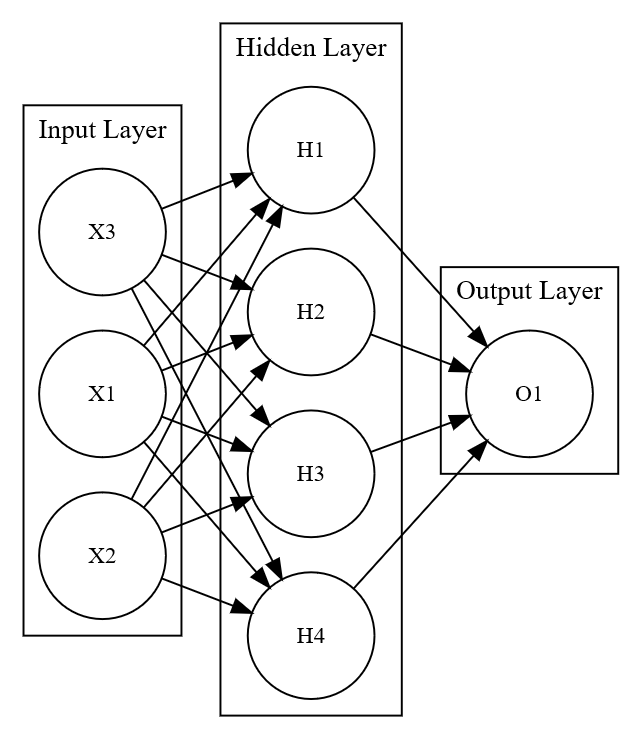

#Backpropogation in Matrix Form for a Single Data-Point
The neural network architecture we will work with consists of 3 nodes in the input layer, 4 nodes in the hidden layer, and 1 node in the output layer. Our specific goal is to address a binary classification problem, where the output is of the 'yes' or 'no' type.

For this purpose, we will utilize the sigmoid activation function, known for its ability to map inputs to a range between 0 and 1, thus facilitating the binary classification. Additionally, the Binary Cross Entropy (BCE) error function will be employed to assess the disparity between predicted and actual values.

Initially, we will focus on a single data point and gradually extend our approach to handle datasets. To begin, we will construct a vector that represents the input values, reflecting the features of the data point.

## Input Vector
Let $x$ be the input vector with three features, $x = [x_1, x_2, x_3]^T$. Each of the elements \(x_1\), \(x_2\), and \(x_3\) represents the values of the features in the input layer.


$$ x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} $$

This represents the input vector for one data point with three features.

## Weight Matrix for the Hidden Layer
Let's denote the weight matrix as $W_{\text{hidden}}$, which connects the input layer to the hidden layer. The bias terms are incorporated into the weight matrix as additional elements in each row.

The dimensions of $W_{\text{hidden}}$ will be $4 \times 4$ (4 nodes in the hidden layer and 3 nodes in the input layer, including the bias term).

The weight matrix $W_{\text{hidden}}$ can be represented as:

$$
W_{\text{hidden}} =
\begin{bmatrix}
w_{11} & w_{12} & w_{13} & \theta_1 \\
w_{21} & w_{22} & w_{23} & \theta_2 \\
w_{31} & w_{32} & w_{33} & \theta_3 \\
w_{41} & w_{42} & w_{43} & \theta_4 \\
\end{bmatrix}
$$

where $w_{ij}$ denotes the weight connecting the $i$ th node in the hidden layer to the $j$ th node in the input layer, an $\theta_i$ represents the bias term for the $i$ th node in the hidden layer.

## Input Vector for the Hidden Layer

Given the input vector \(x\) as:

$$ x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} $4

with the additional element 1 appended at the end, the augmented vector becomes:

$$ x' = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ 1 \end{bmatrix} $4

Then the input vector for the hidden layer, $z_{\text{hidden}}$, is computed as:

$$ z_{\text{hidden}} = W_{\text{hidden}} \cdot x' $$

where $z_{\text{hidden}}$ will be a 4x1 vector representing the input to the hidden layer.

$$
\begin{bmatrix}
w_{11} & w_{12} & w_{13} & \theta_1 \\
w_{21} & w_{22} & w_{23} & \theta_2 \\
w_{31} & w_{32} & w_{33} & \theta_3 \\
w_{41} & w_{42} & w_{43} & \theta_4 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
1
\end{bmatrix}
=
\begin{bmatrix}
w_{11}x_1 + w_{12}x_2 + w_{13}x_3 + \theta_1 \\
w_{21}x_1 + w_{22}x_2 + w_{23}x_3 + \theta_2 \\
w_{31}x_1 + w_{32}x_2 + w_{33}x_3 + \theta_3 \\
w_{41}x_1 + w_{42}x_2 + w_{43}x_3 + \theta_4 \\
\end{bmatrix}
$$

## Activation Vector of the Hidden Layer
The activation vector for the hidden layer is obtained by applying the activation function (in this case, the sigmoid function) to the elements of the input matrix $Z_{\text{hidden}}$. Let's denote the activation vector for the hidden layer as $a_{\text{hidden}}$.

Taking the $z_{\text{hidden}}$ as the input matrix for the hidden layer:

$$
Z_{\text{hidden}} = \begin{bmatrix}
z_1 \\
z_2 \\
z_3 \\
z_4
\end{bmatrix}
$$

then the activation vector for the hidden layer, $a_{\text{hidden}}$, is computed as:

$$a_{\text{hidden}} = \begin{bmatrix}
\sigma(z_1) \\
\sigma(z_2) \\
\sigma(z_3) \\
\sigma(z_4)
\end{bmatrix}
$$

where $\sigma$ is the sigmoid activation function.

## Weight Vector for the Output Layer (Single Node)

The weight vector for the output layer, considering there is a single node, can be denoted as $w_{\text{output}}$. This weight vector will connect the hidden layer to the output layer. The dimension of $w_{\text{output}}$ will be $4 \times 1$ (4 nodes in the hidden layer).

The weight vector $w_{\text{output}}$ can be represented as:

$$ w_{\text{output}} = \begin{bmatrix}
w_1 \\
w_2 \\
w_3 \\
w_4 \\
\end{bmatrix} $$

where $w_1$, $w_2$, $w_3$, and $w_4$ represent the weights connecting the nodes in the hidden layer to the single node in the output layer.

## Input Vector for the Output Layer
Let's define the activation vector $a_{\text{hidden}}$ first as:

$$ a_{\text{hidden}} = \begin{bmatrix} a_1 \\ a_2 \\ a_3 \\ a_4 \end{bmatrix} $$

Then, the input scalar for the output layer can be computed as the dot product of $w_{\text{output}}^T$ and $a_{\text{hidden}}$, represented as:

$$
w_{\text{output}}^T \cdot a_{\text{hidden}} =
\begin{bmatrix} w_1 & w_2 & w_3 & w_4 \end{bmatrix}
\begin{bmatrix} a_1 \\ a_2 \\ a_3 \\ a_4 \end{bmatrix}
= w_1a_1 + w_2a_2 + w_3a_3 + w_4a_4
$$

## Scalar Output of the Output Layer
The output scalar of the output layer is determined by applying the activation function, in this case, the sigmoid function, to the input scalar of the output layer. Let's denote the input scalar as $a_{\text{out}}$  and the output scalar as $y$.

$$
y = \sigma(a_{\text{out}})
$$

where \(\sigma\) is the sigmoid activation function, and the "Input Scalar of the Output Layer" represents the linear combination obtained before applying the activation function.




In [ ]:
import numpy as np

# Initializing values
x1, x2, x3 = 0.5, 0.3, 0.2
w11, w12, w13, theta1 = 0.1, 0.2, 0.3, 0.4
w21, w22, w23, theta2 = 0.2, 0.3, 0.4, 0.5
w31, w32, w33, theta3 = 0.3, 0.4, 0.5, 0.6
w41, w42, w43, theta4 = 0.4, 0.5, 0.6, 0.7
w1, w2, w3, w4 = 0.5, 0.6, 0.7, 0.8

# Input Vector
x = np.array([[x1], [x2], [x3]])

# Weight Matrix for the Hidden Layer
W_hidden = np.array([[w11, w12, w13, theta1],
                     [w21, w22, w23, theta2],
                     [w31, w32, w33, theta3],
                     [w41, w42, w43, theta4]])

# Input Vector for the Hidden Layer
x_augmented = np.append(x, [[1]], axis=0)
z_hidden = np.dot(W_hidden, x_augmented)

# Activation Vector of the Hidden Layer
a_hidden = 1 / (1 + np.exp(-z_hidden))

# Weight Vector for the Output Layer (Single Node)
w_output = np.array([[w1], [w2], [w3], [w4]])

# Input Vector for the Output Layer
a_out = np.dot(w_output.T, a_hidden)

# Scalar Output of the Output Layer
y = 1 / (1 + np.exp(-a_out))

# Printing the relevant vectors, matrices, and scalar
print("Input Vector: \n", x)
print("Weight Matrix for the Hidden Layer: \n", W_hidden)
print("Input Vector for the Hidden Layer: \n", x_augmented)
print("Activation Vector of the Hidden Layer: \n", a_hidden)
print("Weight Vector for the Output Layer: \n", w_output)
print("Input Scalar for the Output Layer: \n", a_out)
print("Scalar Output of the Output Layer: \n", y)


Input Vector: 
 [[0.5]
 [0.3]
 [0.2]]
Weight Matrix for the Hidden Layer: 
 [[0.1 0.2 0.3 0.4]
 [0.2 0.3 0.4 0.5]
 [0.3 0.4 0.5 0.6]
 [0.4 0.5 0.6 0.7]]
Input Vector for the Hidden Layer: 
 [[0.5]
 [0.3]
 [0.2]
 [1. ]]
Activation Vector of the Hidden Layer: 
 [[0.63876318]
 [0.68352089]
 [0.7251195 ]
 [0.76314502]]
Weight Vector for the Output Layer: 
 [[0.5]
 [0.6]
 [0.7]
 [0.8]]
Input Scalar for the Output Layer: 
 [[1.84759378]]
Scalar Output of the Output Layer: 
 [[0.86384434]]


# Backpropogation

## Calculate the Error for the Output Layer (Single Node)

To compute the error scalar using the Binary Cross Entropy (BCE) function, we need the output scalar of the output layer (single node), denoted as $y$, and the observed true value scalar, denoted as $t$.

The BCE function is given by:

$$ E(y, t) = -[t \cdot \log(y) + (1 - t) \cdot \log(1 - y)] $$

where $t$ is the observed true value and $y$ is the output scalar of the output layer.

## Caclualte the Gradient for the Weights of Output Layer
Partial derivative scalar of $E$ with respect to $y$:

$$ \frac{\partial E}{\partial y} = -\left[\frac{t}{y} - \frac{1-t}{1-y}\right] $$

Partial derivative scalar of $y$ with respect to the input for the output layer, denoted as $z_{\text{out}}$:

$$\frac{\partial y}{\partial z_{\text{out}}} =  \sigma(z) \cdot \sigma(1 - y)$$


We can incorporate the bias term $\theta$ into the weight vector $w_{\text{output}}$ as an additional element. Then the calculation of the gradient for the output layer weights can be represented as the **partial derivative scalar of $E$ with respect to $y$** multiplied by the **partial derivative scalar of $y$ with respect to $z_{\text{out}}$, multiplied by the activation vector $a_{\text{hidden}}$ (from the chain rule).

Let the weight vector of the output layer be denoted as $w_{\text{output}}$:

$$
w_{\text{output}} =
\begin{bmatrix}
w_1 \\
w_2 \\
w_3 \\
w_4 \\
\end{bmatrix}
$$

Let the modified weight vector for the output layer be denoted as $w'_{\text{output}}$:

$$
w'_{\text{output}} =
\begin{bmatrix}
w_1 \\
w_2 \\
w_3 \\
w_4 \\
\theta \\
\end{bmatrix}
$$

Then, the gradient for the output layer weights can be represented as:

$$
\frac{\partial E}{\partial w'_{\text{output}}} =
\begin{bmatrix}
\frac{\partial E}{\partial w_1} \\
\frac{\partial E}{\partial w_2} \\
\frac{\partial E}{\partial w_3} \\
\frac{\partial E}{\partial w_4} \\
\frac{\partial E}{\partial \theta} \\
\end{bmatrix}
$$

where each element of the gradient vector is computed using the chain rule, resulting in:

$$
\frac{\partial E}{\partial w'_i} = \frac{\partial E}{\partial y} \times \frac{\partial y}{\partial z_{\text{out}}} \times \frac{\partial z_{\text{out}}}{\partial w'_i}  =  -\left[\frac{t}{y} - \frac{1-t}{1-y}\right] \times \sigma(z_{\text{out}}) \times \sigma(1 - y) \times a_{i, \text{hidden}}
$$

where $i = 1,2,3,4$ denote the elements of the weight vector $w'_{\text{output}}$.

Let's dentoe the activation vector for the hidden layer, $a_{\text{hidden}}$, is a column vector:

$$a_{\text{hidden}} = \begin{bmatrix} a_1 \\ a_2 \\ a_3 \\ a_4 \end{bmatrix} $$


We can now express the gradient vector $\frac{\partial E}{\partial w'} $ as follows:

$$
\frac{\partial E}{\partial w'} = \frac{\partial E}{\partial y} \times \frac{\partial y}{\partial z_{\text{out}}} \times \frac{\partial z_{\text{out}}}{\partial w'_i}  =  -\left[\frac{t}{y} - \frac{1-t}{1-y}\right] \times \sigma(z_{\text{out}}) \times \sigma(1 - y) \cdot a_{\text{hidden}}
$$


## Calculate the Gradient for the Weights of the Hidden Layer

The weight matrix for the hidden layer, including the $\theta $terms, is denoted as $W'_{\text{hidden}}$:

$$
W'_{\text{hidden}} =
\begin{bmatrix}
w_{11} & w_{12} & w_{13} & \theta_1 \\
w_{21} & w_{22} & w_{23} & \theta_2 \\
w_{31} & w_{32} & w_{33} & \theta_3 \\
w_{41} & w_{42} & w_{43} & \theta_4 \\
\end{bmatrix}
$$

where $i = 1,2,3,4$ denoted the nodes of hidden layer and  $j=1,2,3$ dentoted the input layer nodes (input layer values).

The partial derivative of error $ E $ with respect to each weight can be calculated using the chain rule. For each weight $ w_{ij} $ and the bias term \$theta_i $, the derivatives are as follows:

$$
\frac{\partial E}{\partial w_{ij}} = \frac{\partial E}{\partial y} \times \frac{\partial y}{\partial z_{\text{out}}} \times \frac{\partial z_{\text{out}}}{\partial a_{i, \text{hidden}}} \times \frac{\partial a_{i, \text{hidden}}}{\partial z_{i, \text{hidden}}} \times \frac{\partial z_{i, \text{hidden}}}{\partial w_{ij}} \\
= \frac{\partial E}{\partial y} \times \frac{\partial y}{\partial z_{\text{out}}} \times w_{i, \text{out}} \times \sigma(z_{i, \text{hidden}}) \times \sigma(1 - z_{i, \text{hidden}}) \times x_{j, \text{input}}
$$

and

$$
\frac{\partial E}{\partial \theta_i} = \frac{\partial E}{\partial y} \times \frac{\partial y}{\partial z_{\text{out}}} \times \frac{\partial z_{\text{out}}}{\partial a_{i, \text{hidden}}} \times \frac{\partial a_{i, \text{hidden}}}{\partial z_{i, \text{hidden}}} \times \frac{\partial z_{i, \text{hidden}}}{\partial \theta_i} \\
= \frac{\partial E}{\partial y} \times \frac{\partial y}{\partial z_{\text{out}}} \times w_{i, \text{out}} \times \sigma(z_{i, \text{hidden}}) \times \sigma(1 - z_{i, \text{hidden}}) \times 1
$$


The derivative vector $ \frac{\partial z_{\text{hidden}}}{\partial W'_{\text{hidden}}} $ can be represented as:

$$
\frac{\partial z_{\text{hidden}}}{\partial W'_{\text{hidden}}} = x'_{\text{input}}
$$

where $ x'_{\text{input}} $ is the input layer vector, augmented with the bias term.

$$ x'_{\text{input}} = \begin{bmatrix} x_{1} & x_{2} & x_{3} & 1 \end{bmatrix}$$

and

$$ z_{\text{hidden}} = \begin{bmatrix} z_{1} & z_{2} & z_{3} & z_{4} \end{bmatrix}$$

The derivative vector $ \frac{\partial z_{\text{out}}}{\partial z_{\text{hidden}}} $ can be represented element wise multiplication:

$$
\frac{\partial z_{\text{out}}}{\partial z_{\text{hidden}}} = \frac{\partial z_{\text{out}}}{\partial a_{\text{hidden}}} \odot \frac{\partial a_{\text{hidden}}}{\partial z_{\text{hidden}}} = w_{\text{output}} \odot \sigma(z_{\text{hidden}})
$$


We can now express the gradient vector $\frac{\partial E}{\partial W'_{\text{hidden}}}$ as follows:

$$
\frac{\partial E}{\partial W'_{\text{hidden}}} = \frac{\partial E}{\partial y} \times \frac{\partial y}{\partial z_{\text{out}}} \times \frac{\partial z_{\text{out}}}{\partial a_{i, \text{hidden}}} \times \frac{\partial a_{i, \text{hidden}}}{\partial z_{i, \text{hidden}}} \times \frac{\partial z_{i, \text{hidden}}}{\partial w_{ij}} \\
= = \frac{\partial E}{\partial y} \times \frac{\partial y}{\partial z_{\text{out}}} \times w_{\text{output}} \odot \sigma(z_{\text{hidden}}) \otimes x'_{\text{input}}
$$

## Update Weights (including $\theta$)

The weight update equations for the output layer and the hidden layer, incorporating the gradient information derived, can be represented as follows:

### Output Layer Weight Update
For the weight vector of the output layer $w'_{\text{output}}$, the weight update equation can be expressed as:

$$
w'_{\text{output}}(n+1) = w'_{\text{output}}(n) - \alpha \cdot \frac{\partial E}{\partial w'_{\text{output}}}
$$

where $w'_{\text{output}}(n+1)$ is the updated weight vector, $w'_{\text{output}}(n)$ is the current weight vector, $\alpha$ is the learning rate, and $\frac{\partial E}{\partial w'_{\text{output}}}$ is the gradient vector for the output layer weights.

### Hidden Layer Weight Update
For the weight matrix of the hidden layer $W'_{\text{hidden}}$, the weight update equation can be expressed as:

$$
W'_{\text{hidden}}(n+1) = W'_{\text{hidden}}(n) - \alpha \cdot \frac{\partial E}{\partial W'_{\text{hidden}}}
$$

where $W'_{\text{hidden}}(n+1)$ is the updated weight matrix, $W'_{\text{hidden}}(n)$ is the current weight matrix, $\alpha $ is the learning rate, and $\frac{\partial E}{\partial W'_{\text{hidden}}}$ is the gradient matrix for the hidden layer weights.


# Matrix Notation of Neural Nets for a Dataset

$ \text{Let } X \text{ be the input matrix with five data points and three features, where each data point is represented as a row}$:

$ X = \begin{bmatrix}
x_{11} & x_{12} & x_{13} \\
x_{21} & x_{22} & x_{23} \\
x_{31} & x_{32} & x_{33} \\
x_{41} & x_{42} & x_{43} \\
x_{51} & x_{52} & x_{53} \\
\end{bmatrix} $

$ \text{Let } W_{\text{hidden}} \text{ be the weight matrix with dimensions 4x4 connecting the input layer to the hidden layer}$:

$ W_{\text{hidden}} =
\begin{bmatrix}
w_{11} & w_{12} & w_{13} & \theta_1 \\
w_{21} & w_{22} & w_{23} & \theta_2 \\
w_{31} & w_{32} & w_{33} & \theta_3 \\
w_{41} & w_{42} & w_{43} & \theta_4 \\
\end{bmatrix} $

$ \text{Let } X' \text{ be the input matrix for the hidden layer, obtained by augmenting ones as an additional column to } X \text{ as follows}$:

$ X' = \begin{bmatrix}
x_{11} & x_{12} & x_{13} & 1 \\
x_{21} & x_{22} & x_{23} & 1 \\
x_{31} & x_{32} & x_{33} & 1 \\
x_{41} & x_{42} & x_{43} & 1 \\
x_{51} & x_{52} & x_{53} & 1 \\
\end{bmatrix} $

$ \text{Let } Z_{\text{hidden}} \text{ be the input matrix for the hidden layer, obtained by the matrix multiplication of } W_{\text{hidden}} \text{ and } X' \text{ as follows}$:

$ Z_{\text{hidden}} = X' \cdot W_{\text{hidden}} $

$$
Z_{\text{hidden}} = \begin{bmatrix}
x_{11}w_{11} + x_{12}w_{21} + x_{13}w_{31} + 1 \cdot \theta_1 & x_{11}w_{12} + x_{12}w_{22} + x_{13}w_{32} + 1 \cdot \theta_2 & x_{11}w_{13} + x_{12}w_{23} + x_{13}w_{33} + 1 \cdot \theta_3 & x_{11} + x_{12} + x_{13} + 1 \cdot \theta_4 \\
x_{21}w_{11} + x_{22}w_{21} + x_{23}w_{31} + 1 \cdot \theta_1 & x_{21}w_{12} + x_{22}w_{22} + x_{23}w_{32} + 1 \cdot \theta_2 & x_{21}w_{13} + x_{22}w_{23} + x_{23}w_{33} + 1 \cdot \theta_3 & x_{21} + x_{22} + x_{23} + 1 \cdot \theta_4 \\
x_{31}w_{11} + x_{32}w_{21} + x_{33}w_{31} + 1 \cdot \theta_1 & x_{31}w_{12} + x_{32}w_{22} + x_{33}w_{32} + 1 \cdot \theta_2 & x_{31}w_{13} + x_{32}w_{23} + x_{33}w_{33} + 1 \cdot \theta_3 & x_{31} + x_{32} + x_{33} + 1 \cdot \theta_4 \\
x_{41}w_{11} + x_{42}w_{21} + x_{43}w_{31} + 1 \cdot \theta_1 & x_{41}w_{12} + x_{42}w_{22} + x_{43}w_{32} + 1 \cdot \theta_2 & x_{41}w_{13} + x_{42}w_{23} + x_{43}w_{33} + 1 \cdot \theta_3 & x_{41} + x_{42} + x_{43} + 1 \cdot \theta_4 \\
x_{51}w_{11} + x_{52}w_{21} + x_{53}w_{31} + 1 \cdot \theta_1 & x_{51}w_{12} + x_{52}w_{22} + x_{53}w_{32} + 1 \cdot \theta_2 & x_{51}w_{13} + x_{52}w_{23} + x_{53}w_{33} + 1 \cdot \theta_3 & x_{51} + x_{52} + x_{53} + 1 \cdot \theta_4 \\
\end{bmatrix}
$$


$ \text{Let } A_{\text{hidden}} \text{ be the activation matrix for the hidden layer, obtained by applying the sigmoid function to each element of } Z_{\text{hidden}} \text{ as follows}$:

$$
A_{\text{hidden}} = \begin{bmatrix}
\sigma(x_{11}w_{11} + x_{12}w_{21} + x_{13}w_{31} + 1 \cdot \theta_1) & \sigma(x_{11}w_{12} + x_{12}w_{22} + x_{13}w_{32} + 1 \cdot \theta_2) & \sigma(x_{11}w_{13} + x_{12}w_{23} + x_{13}w_{33} + 1 \cdot \theta_3) & \sigma(x_{11} + x_{12} + x_{13} + 1 \cdot \theta_4) \\
\sigma(x_{21}w_{11} + x_{22}w_{21} + x_{23}w_{31} + 1 \cdot \theta_1) & \sigma(x_{21}w_{12} + x_{22}w_{22} + x_{23}w_{32} + 1 \cdot \theta_2) & \sigma(x_{21}w_{13} + x_{22}w_{23} + x_{23}w_{33} + 1 \cdot \theta_3) & \sigma(x_{21} + x_{22} + x_{23} + 1 \cdot \theta_4) \\
\sigma(x_{31}w_{11} + x_{32}w_{21} + x_{33}w_{31} + 1 \cdot \theta_1) & \sigma(x_{31}w_{12} + x_{32}w_{22} + x_{33}w_{32} + 1 \cdot \theta_2) & \sigma(x_{31}w_{13} + x_{32}w_{23} + x_{33}w_{33} + 1 \cdot \theta_3) & \sigma(x_{31} + x_{32} + x_{33} + 1 \cdot \theta_4) \\
\sigma(x_{41}w_{11} + x_{42}w_{21} + x_{43}w_{31} + 1 \cdot \theta_1) & \sigma(x_{41}w_{12} + x_{42}w_{22} + x_{43}w_{32} + 1 \cdot \theta_2) & \sigma(x_{41}w_{13} + x_{42}w_{23} + x_{43}w_{33} + 1 \cdot \theta_3) & \sigma(x_{41} + x_{42} + x_{43} + 1 \cdot \theta_4) \\
\sigma(x_{51}w_{11} + x_{52}w_{21} + x_{53}w_{31} + 1 \cdot \theta_1) & \sigma(x_{51}w_{12} + x_{52}w_{22} + x_{53}w_{32} + 1 \cdot \theta_2) & \sigma(x_{51}w_{13} + x_{52}w_{23} + x_{53}w_{33} + 1 \cdot \theta_3) & \sigma(x_{51} + x_{52} + x_{53} + 1 \cdot \theta_4) \\
\end{bmatrix}
$$

$ \text{Let } w_{\text{output}} \text{ be the weight vector for the output layer, connecting the hidden layer to the output layer, given as}: $

$$ w_{\text{output}} = \begin{bmatrix}
w_1 \\
w_2 \\
w_3 \\
w_4 \\
\end{bmatrix} $$

$ \text{Let } w' \text{ be the weight vector for the output layer (Single node), obtained by augmenting } \theta \text{as an additional column to} w \text{ as follows}$:

$$ w'_{\text{output}} = \begin{bmatrix} w_1 \\ w_2 \\ w_3 \\ w_4 \\ \theta_5 \end{bmatrix} $$

The fifth element $theta$ represents the bias associated with the output layer.

$ \text{Let }  z_{\text{output}} \text{ be the input vector for the output layer, computed as the dot product of } A_{\text{hidden}} \text{ and } w'_{\text{output}} $:

$ z_{\text{output}} =  A_{\text{hidden}} \cdot  w'_{\text{output}} $

$$
A_{\text{out}} = \begin{bmatrix}
\sigma(x_{11}w_{11} + x_{12}w_{21} + x_{13}w_{31} + 1 \cdot \theta_1)w_1 + \sigma(x_{11}w_{12} + x_{12}w_{22} + x_{13}w_{32} + 1 \cdot \theta_2)w_2 + \sigma(x_{11}w_{13} + x_{12}w_{23} + x_{13}w_{33} + 1 \cdot \theta_3)w_3 + \sigma(x_{11} + x_{12} + x_{13} + 1 \cdot \theta_4)w_4 + 1 \cdot \theta_5 \\
\sigma(x_{21}w_{11} + x_{22}w_{21} + x_{23}w_{31} + 1 \cdot \theta_1)w_1 + \sigma(x_{21}w_{12} + x_{22}w_{22} + x_{23}w_{32} + 1 \cdot \theta_2)w_2 + \sigma(x_{21}w_{13} + x_{22}w_{23} + x_{23}w_{33} + 1 \cdot \theta_3)w_3 + \sigma(x_{21} + x_{22} + x_{23} + 1 \cdot \theta_4)w_4 + 1 \cdot \theta_5 \\
\sigma(x_{31}w_{11} + x_{32}w_{21} + x_{33}w_{31} + 1 \cdot \theta_1)w_1 + \sigma(x_{31}w_{12} + x_{32}w_{22} + x_{33}w_{32} + 1 \cdot \theta_2)w_2 + \sigma(x_{31}w_{13} + x_{32}w_{23} + x_{33}w_{33} + 1 \cdot \theta_3)w_3 + \sigma(x_{31} + x_{32} + x_{33} + 1 \cdot \theta_4)w_4 + 1 \cdot \theta_5 \\
\sigma(x_{41}w_{11} + x_{42}w_{21} + x_{43}w_{31} + 1 \cdot \theta_1)w_1 + \sigma(x_{41}w_{12} + x_{42}w_{22} + x_{43}w_{32} + 1 \cdot \theta_2)w_2 + \sigma(x_{41}w_{13} + x_{42}w_{23} + x_{43}w_{33} + 1 \cdot \theta_3)w_3 + \sigma(x_{41} + x_{42} + x_{43} + 1 \cdot \theta_4)w_4 + 1 \cdot \theta_5 \\
\sigma(x_{51}w_{11} + x_{52}w_{21} + x_{53}w_{31} + 1 \cdot \theta_1)w_1 + \sigma(x_{51}w_{12} + x_{52}w_{22} + x_{53}w_{32} + 1 \cdot \theta_2)w_2 + \sigma(x_{51}w_{13} + x_{52}w_{23} + x_{53}w_{33} + 1 \cdot \theta_3)w_3 + \sigma(x_{51} + x_{52} + x_{53} + 1 \cdot \theta_4)w_4 + 1 \cdot \theta_5 \\
\end{bmatrix}
$$

$ \text{Let } y \text{ be the output vector of the output layer, determined by applying the sigmoid function to the input vector of the output layer as follows}: $

$ y = \sigma(z_{\text{out}}) $

$$
y = \begin{bmatrix}
\sigma\left(\sigma(x_{11}w_{11} + x_{12}w_{21} + x_{13}w_{31} + 1 \cdot \theta_1)w_1 + \sigma(x_{11}w_{12} + x_{12}w_{22} + x_{13}w_{32} + 1 \cdot \theta_2)w_2 + \sigma(x_{11}w_{13} + x_{12}w_{23} + x_{13}w_{33} + 1 \cdot \theta_3)w_3 + \sigma(x_{11} + x_{12} + x_{13} + 1 \cdot \theta_4)w_4 + 1 \cdot \theta_5\right) \\
\sigma\left(\sigma(x_{21}w_{11} + x_{22}w_{21} + x_{23}w_{31} + 1 \cdot \theta_1)w_1 + \sigma(x_{21}w_{12} + x_{22}w_{22} + x_{23}w_{32} + 1 \cdot \theta_2)w_2 + \sigma(x_{21}w_{13} + x_{22}w_{23} + x_{23}w_{33} + 1 \cdot \theta_3)w_3 + \sigma(x_{21} + x_{22} + x_{23} + 1 \cdot \theta_4)w_4 + 1 \cdot \theta_5\right) \\
\sigma\left(\sigma(x_{31}w_{11} + x_{32}w_{21} + x_{33}w_{31} + 1 \cdot \theta_1)w_1 + \sigma(x_{31}w_{12} + x_{32}w_{22} + x_{33}w_{32} + 1 \cdot \theta_2)w_2 + \sigma(x_{31}w_{13} + x_{32}w_{23} + x_{33}w_{33} + 1 \cdot \theta_3)w_3 + \sigma(x_{31} + x_{32} + x_{33} + 1 \cdot \theta_4)w_4 + 1 \cdot \theta_5\right) \\
\sigma\left(\sigma(x_{41}w_{11} + x_{42}w_{21} + x_{43}w_{31} + 1 \cdot \theta_1)w_1 + \sigma(x_{41}w_{12} + x_{42}w_{22} + x_{43}w_{32} + 1 \cdot \theta_2)w_2 + \sigma(x_{41}w_{13} + x_{42}w_{23} + x_{43}w_{33} + 1 \cdot \theta_3)w_3 + \sigma(x_{41} + x_{42} + x_{43} + 1 \cdot \theta_4)w_4 + 1 \cdot \theta_5\right) \\
\sigma\left(\sigma(x_{51}w_{11} + x_{52}w_{21} + x_{53}w_{31} + 1 \cdot \theta_1)w_1 + \sigma(x_{51}w_{12} + x_{52}w_{22} + x_{53}w_{32} + 1 \cdot \theta_2)w_2 + \sigma(x_{51}w_{13} + x_{52}w_{23} + x_{53}w_{33} + 1 \cdot \theta_3)w_3 + \sigma(x_{51} + x_{52} + x_{53} + 1 \cdot \theta_4)w_4 + 1 \cdot \theta_5\right)
\end{bmatrix}
$$

In [ ]:
import numpy as np

# Input matrix X
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12],
              [13, 14, 15]])

# Weight matrix for the hidden layer
W_hidden = np.array([[0.1, 0.2, 0.3, 0.4],
                     [0.5, 0.6, 0.7, 0.8],
                     [0.9, 1.0, 1.1, 1.2],
                     [1.3, 1.4, 1.5, 1.6]])

# Adding ones to the input matrix for the hidden layer
X_hidden = np.hstack((X, np.ones((X.shape[0], 1))))

# Calculating the hidden layer input matrix
Z_hidden = np.dot(X_hidden, W_hidden)

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Activation matrix for the hidden layer
A_hidden = sigmoid(Z_hidden)

# Weight vector for the output layer
w_output = np.array([0.1, 0.2, 0.3, 0.4])

# Augmenting theta to the weight vector for the output layer
w_output_prime = np.append(w_output, 0.5)  # Assuming theta is 0.5

# Input vector for the output layer
Z_output = np.dot(A_hidden, w_output_prime)

# Output vector of the output layer
y = sigmoid(Z_output)

# Printing the matrices and vectors
print("X:")
print(X)
print("\nW_hidden:")
print(W_hidden)
print("\nX_hidden:")
print(X_hidden)
print("\nZ_hidden:")
print(Z_hidden)
print("\nA_hidden:")
print(A_hidden)
print("\nw_output:")
print(w_output)
print("\nw_output_prime:")
print(w_output_prime)
print("\nZ_output:")
print(Z_output)
print("\ny:")
print(y)


ValueError: ignored

# Backpropagation in Matrix Form for a Dataset

## Error Vector

We can define vector $t$, the true observed values for a 5 data-points as:

$$ t = \begin{bmatrix} t_1 \\ t_2 \\ t_3 \\ t_4 \\ t_5 \\ \end{bmatrix} $$

Now, we can define the scalar $e$, the mean difference between the true values $t$ and predicted values $y$:

$$
e = \frac{1}{5}\sum_{i=1}^{5}(- t_i \log(y_i) - (1-t_i) \log(1-y_i))
$$

Here, \(t\) is the true label (0 or 1) and \(y\) is the predicted probability of the class being 1. The BCE loss function penalizes the model more as the predicted probability deviates from the actual label.


$$
\begin{aligned}
e = \frac{1}{5} \cdot \big[ -t_1 \cdot \log(\sigma\left(\sigma(x_{11}w_{11} + x_{12}w_{21} + x_{13}w_{31} + 1 \cdot \theta_1)w_1 + \sigma(x_{11}w_{12} + x_{12}w_{22} + x_{13}w_{32} + 1 \cdot \theta_2)w_2 + \sigma(x_{11}w_{13} + x_{12}w_{23} + x_{13}w_{33} + 1 \cdot \theta_3)w_3 + \sigma(x_{11} + x_{12} + x_{13} + 1 \cdot \theta_4)w_4 + 1 \cdot \theta_5\right))  \\
-(1-t_1) \cdot (1 -\log(\sigma\left(\sigma(x_{11}w_{11} + x_{12}w_{21} + x_{13}w_{31} + 1 \cdot \theta_1)w_1 + \sigma(x_{11}w_{12} + x_{12}w_{22} + x_{13}w_{32} + 1 \cdot \theta_2)w_2 + \sigma(x_{11}w_{13} + x_{12}w_{23} + x_{13}w_{33} + 1 \cdot \theta_3)w_3 + \sigma(x_{11} + x_{12} + x_{13} + 1 \cdot \theta_4)w_4 + 1 \cdot \theta_5\right))) \quad - \quad ...
\end{aligned}
$$

## Gradient of Error Scalar with Respect to Output Layer Weights Vector (Including $\theta_5$)

$$
\frac{\partial e}{\partial w'_{\text{output}}} = \begin{bmatrix}
\frac{\partial e}{\partial w_1} \\
\frac{\partial e}{\partial w_2} \\
\frac{\partial e}{\partial w_3} \\
\frac{\partial e}{\partial w_4} \\
\frac{\partial e}{\partial \theta_5} \\
\end{bmatrix}
$$

where

$$
\frac{\partial e}{\partial w_1} = \frac{1}{5} \sum_{i=1}^{5} \frac{\partial}{\partial w_1} (- t_i \log(y_i) - (1-t_i) \log(1-y_i)) ,
$$

$$
\frac{\partial e}{\partial w_2} = \frac{1}{5} \sum_{i=1}^{5} \frac{\partial}{\partial w_2} (- t_i \log(y_i) - (1-t_i) \log(1-y_i)) ,
$$

$$
\frac{\partial e}{\partial w_3} = \frac{1}{5} \sum_{i=1}^{5} \frac{\partial}{\partial w_3} (- t_i \log(y_i) - (1-t_i) \log(1-y_i)) ,
$$

$$
\frac{\partial e}{\partial w_4} = \frac{1}{5} \sum_{i=1}^{5} \frac{\partial}{\partial w_4} (- t_i \log(y_i) - (1-t_i) \log(1-y_i)) ,
$$

$$
\text{and} \\
\frac{\partial e}{\partial \theta_5} = \frac{1}{5} \sum_{i=1}^{5} \frac{\partial}{\partial \theta_5} (t_i - y_i) .
$$

We can expand the expression for $\frac{\partial e}{\partial w_1}$ as follows:

$$
\frac{\partial e}{\partial w_1} = - \frac{1}{5} \times \big[ \\
-\left[\frac{t_1}{y_1} - \frac{1-t_1}{1-y_1}\right] \cdot
\\
\bigg[ \sigma\left(\sigma(x_{11}w_{11} + x_{12}w_{21} + x_{13}w_{31} + 1 \cdot \theta_1)w_1 + \sigma(x_{11}w_{12} + x_{12}w_{22} + x_{13}w_{32} + 1 \cdot \theta_2)w_2 + \sigma(x_{11}w_{13} + x_{12}w_{23} + x_{13}w_{33} + 1 \cdot \theta_3)w_3 + \sigma(x_{11} + x_{12} + x_{13} + 1 \cdot \theta_4)w_4 + 1 \cdot \theta_5\right) \cdot\\
\big(1 - \big( \sigma\left(\sigma(x_{11}w_{11} + x_{12}w_{21} + x_{13}w_{31} + 1 \cdot \theta_1)w_1 + \sigma(x_{11}w_{12} + x_{12}w_{22} + x_{13}w_{32} + 1 \cdot \theta_2)w_2 + \sigma(x_{11}w_{13} + x_{12}w_{23} + x_{13}w_{33} + 1 \cdot \theta_3)w_3 + \sigma(x_{11} + x_{12} + x_{13} + 1 \cdot \theta_4)w_4 + 1 \cdot \theta_5\right) \big) \bigg] \cdot \\
\bigg[ \sigma(x_{11}w_{11} + x_{12}w_{21} + x_{13}w_{31} + 1 \cdot \theta_1) \bigg]
\\
+ \quad ...
$$

We can use a similar approach to find the expressions for $\frac{\partial e}{\partial w_2}, \frac{\partial e}{\partial w_3}, \frac{\partial e}{\partial w_4},$ and $\frac{\partial e}{\partial \theta_5}$ by differentiating with respect to $w_2, w_3, w_4,$ and $\theta_5$ respectively.

The above gradient vector can be calculated easily by expressing it as:

$$
\frac{\partial e}{\partial w'} = \frac{\partial e}{\partial y} \times \frac{\partial y}{\partial z_{\text{out}}} \times \frac{\partial z_{\text{out}}}{\partial w'}  =  -\left[\frac{t}{y} - \frac{1-t}{1-y}\right] \times \sigma(z_{\text{out}}) \times \sigma(1 -  z_{\text{out}}) \cdot a_{\text{hidden}}
$$

We can express the gradient vector $\frac{\partial E}{\partial W'_{\text{hidden}}}$ as follows:

$$
\frac{\partial e}{\partial W'_{\text{hidden}}} = \frac{\partial e}{\partial y} \times \frac{\partial y}{\partial z_{\text{out}}} \times \frac{\partial z_{\text{out}}}{\partial a_{i, \text{hidden}}} \times \frac{\partial a_{i, \text{hidden}}}{\partial z_{i, \text{hidden}}} \times \frac{\partial z_{i, \text{hidden}}}{\partial w_{ij}} \\
= = \frac{\partial E}{\partial y} \times \frac{\partial y}{\partial z_{\text{out}}} \times w_{\text{output}} \odot \sigma(z_{\text{hidden}}) \otimes x'_{\text{input}}
$$

## Update Weights (including $\theta$)

$$
w'_{\text{output}}(n+1) = w'_{\text{output}}(n) - \alpha \cdot \frac{\partial E}{\partial w'_{\text{output}}}
$$

where $w'_{\text{output}}(n+1)$ is the updated weight vector, $w'_{\text{output}}(n)$ is the current weight vector, $\alpha$ is the learning rate, and $\frac{\partial E}{\partial w'_{\text{output}}}$ is the gradient vector for the output layer weights.

$$
W'_{\text{hidden}}(n+1) = W'_{\text{hidden}}(n) - \alpha \cdot \frac{\partial E}{\partial W'_{\text{hidden}}}
$$

where $W'_{\text{hidden}}(n+1)$ is the updated weight matrix, $W'_{\text{hidden}}(n)$ is the current weight matrix, $\alpha $ is the learning rate, and $\frac{\partial E}{\partial W'_{\text{hidden}}}$ is the gradient matrix for the hidden layer weights.